In [1]:
import glob
import pandas as pd

In [2]:
us_states = {
    1: "Alabama",
    2: "Alaska",
    4: "Arizona",
    5: "Arkansas",
    6: "California",
    8: "Colorado",
    9: "Connecticut",
    10: "Delaware",
    11: "District of Columbia",
    12: "Florida",
    13: "Georgia",
    15: "Hawaii",
    16: "Idaho",
    17: "Illinois",
    18: "Indiana",
    19: "Iowa",
    20: "Kansas",
    21: "Kentucky",
    22: "Louisiana",
    23: "Maine",
    24: "Maryland",
    25: "Massachusetts",
    26: "Michigan",
    27: "Minnesota",
    28: "Mississippi",
    29: "Missouri",
    30: "Montana",
    31: "Nebraska",
    32: "Nevada",
    33: "New Hampshire",
    34: "New Jersey",
    35: "New Mexico",
    36: "New York",
    37: "North Carolina",
    38: "North Dakota",
    39: "Ohio",
    40: "Oklahoma",
    41: "Oregon",
    42: "Pennsylvania",
    44: "Rhode Island",
     45: "South Carolina",
    46: "South Dakota",
    47: "Tennessee",
    48: "Texas",
    49: "Utah",
    50: "Vermont",
    51: "Virginia",
    53: "Washington",
    54: "West Virginia",
    55: "Wisconsin",
    56: "Wyoming",
    72: "Puerto Rico",
    52: "Puerto Rico",
    57: "Virgin Islands"
}

In [3]:
f = 'state2state/weekly_state2state_20*.csv'
print(f)
csv_files = glob.glob(f)
print(len(csv_files))

state2state/weekly_state2state_20*.csv
156


In [4]:
df = pd.read_csv(csv_files[0])

In [5]:
state_ids = list(set(df["geoid_o"]))

In [6]:
states_mob = []
for i in set(df["geoid_o"]):
    states_mob.append(us_states[i])

In [8]:
len(states_mob)

52

In [61]:
master_mob = {}

master_mob["states"] = states_mob



In [62]:
dummy = []
for sid in state_ids:
    dummy.append(0)

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()

x=list(master_df[master_df["states"]=="Texas"].iloc[0].tolist())
state=x[0]
y1=x[1:]
values = [[value] for value in y1]
scaler.fit(values)
print(min(y1))
print(max(y1))


0
505370


In [65]:
scaled_values = scaler.transform([[1500000]])[0][0]
print(scaled_values)

2.9681223657914004


In [94]:

df_sum1 = 0
df_sum2 = 0

for week in range(1,len(csv_files)+1+52):
    if week<=155:
        data = []
        df = pd.read_csv(csv_files[week])
        for sid in state_ids:
            # find the corresponding row in df_month based on the 'fips' value
                df_sum1 =  df.loc[df['geoid_o'] == sid]

                y = df_sum1.loc[df_sum1['geoid_d'] == sid]["pop_flows"].iloc[0]

                df_sum1 = df_sum1["pop_flows"].sum()

                df_sum2 =  df.loc[df['geoid_d'] == sid]["pop_flows"].sum()
                #print("sum1",df_sum1)
                #print("y",y)
                #print("sum 2",df_sum2)
                

                x=list(master_df[master_df["states"]==us_states[sid]].iloc[0].tolist())
                dummy_state=x[0]
                dummy_y1=x[1:]
                
                val = df_sum1 + df_sum2 - 2*y
               
                
                data.append(val)
        #print(len(data))
        master_mob["week"+str(week)]=data
    else:
        #print(len(dummy))
        master_mob["week"+str(week)]=dummy
        
        

In [95]:
len(master_mob["states"])

52

In [96]:
master_mob

{'states': ['Alabama',
  'Alaska',
  'Arizona',
  'Arkansas',
  'California',
  'Colorado',
  'Connecticut',
  'Delaware',
  'District of Columbia',
  'Florida',
  'Georgia',
  'Hawaii',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'Kansas',
  'Kentucky',
  'Louisiana',
  'Maine',
  'Maryland',
  'Massachusetts',
  'Michigan',
  'Minnesota',
  'Mississippi',
  'Missouri',
  'Montana',
  'Nebraska',
  'Nevada',
  'New Hampshire',
  'New Jersey',
  'New Mexico',
  'New York',
  'North Carolina',
  'North Dakota',
  'Ohio',
  'Oklahoma',
  'Oregon',
  'Pennsylvania',
  'Rhode Island',
  'South Carolina',
  'South Dakota',
  'Tennessee',
  'Texas',
  'Utah',
  'Vermont',
  'Virginia',
  'Washington',
  'West Virginia',
  'Wisconsin',
  'Wyoming',
  'Puerto Rico'],
 'week1': [5777339.0,
  444286.0,
  6751566.0,
  3402013.0,
  17898338.0,
  5224425.0,
  3990930.0,
  2135199.0,
  6183047.0,
  20365543.0,
  12421313.0,
  2263133.0,
  1905242.0,
  11706714.0,
  7034786.0,
  3293999.0,
  40

In [97]:
len(master_mob["week1"])

52

In [98]:
m_df = pd.DataFrame(master_mob)

In [99]:
m_df

states       week1       week2       week3       week4  \
0                Alabama   5777339.0   5861422.0   5389758.0   5311903.0   
1                 Alaska    444286.0    445033.0    397219.0    363315.0   
2                Arizona   6751566.0   6537622.0   6507985.0   6038409.0   
3               Arkansas   3402013.0   3641807.0   3425060.0   3164005.0   
4             California  17898338.0  18435476.0  15971472.0  15197498.0   
5               Colorado   5224425.0   5106305.0   4785812.0   4551312.0   
6            Connecticut   3990930.0   4492497.0   3847112.0   3962036.0   
7               Delaware   2135199.0   2275245.0   2110991.0   2174410.0   
8   District of Columbia   6183047.0   5122205.0   4997852.0   5093424.0   
9                Florida  20365543.0  20449165.0  18685319.0  18629281.0   
10               Georgia  12421313.0  11837704.0  11289143.0  10901292.0   
11                Hawaii   2263133.0   2300036.0   2035285.0   1968599.0   
12                 Idaho   1905242.0   1973290.0   1887145.0   1638158.0   
13              Illinois  11706714.0  11720301.0  10609819.0  10905174.0   
14               Indiana   7034786.0   7265658.0   6666306.0   6577577.0   
15                  Iowa   3293999.0   3375328.0   3259079.0   3165266.0   
16                Kansas   4096292.0   4339702.0   4223035.0   3795913.0   
17              Kentucky   5434114.0   5901788.0   5647439.0   5463710.0   
18             Louisiana   5086081.0   4827366.0   4681694.0   4573849.0   
19                 Maine   1054399.0   1208613.0   1072073.0   1041815.0   
20              Maryland  10164765.0  10294454.0   9398235.0   9351451.0   
21         Massachusetts   6891673.0   7733814.0   6910517.0   6850160.0   
22              Michigan   5661375.0   5639380.0   5111915.0   5146804.0   
23             Minnesota   4980272.0   4984891.0   4479488.0   4219236.0   
24           Mississippi   4378342.0   4405605.0   4116677.0   4009341.0   
25              Missouri   7671964.0   8088599.0   7693488.0   6970534.0   
26               Montana    899102.0    907378.0    873687.0    806445.0   
27              Nebraska   1806114.0   1945655.0   1924175.0   1777710.0   
28                Nevada   9192586.0   9731934.0   7961362.0   7734267.0   
29         New Hampshire   2736592.0   3173808.0   2881861.0   2864947.0   
30            New Jersey  11652947.0  12486336.0  11507462.0  11541892.0   
31            New Mexico   2363355.0   2383229.0   2335197.0   2212053.0   
32              New York  16282527.0  17050588.0  14868318.0  15114029.0   
33        North Carolina  10226456.0   9767145.0   9090678.0   8676170.0   
34          North Dakota   1126411.0   1086736.0   1041796.0    965168.0   
35                  Ohio   8770705.0   9459156.0   8816373.0   8571266.0   
36              Oklahoma   3634083.0   3865013.0   3593900.0   3251837.0   
37                Oregon   3987687.0   4164200.0   3842118.0   3111786.0   
38          Pennsylvania  11354332.0  12319259.0  11214474.0  11425204.0   
39          Rhode Island   1873573.0   2199906.0   1914221.0   1938314.0   
40        South Carolina   7207277.0   6991043.0   6448493.0   6275594.0   
41          South Dakota    985342.0   1030600.0    985928.0    863226.0   
42             Tennessee   9229633.0   9258209.0   8744137.0   8492518.0   
43                 Texas  15187451.0  15317056.0  14281878.0  13342926.0   
44                  Utah   2982881.0   3026523.0   2895629.0   2678861.0   
45               Vermont   1081901.0   1141493.0   1003975.0   1020968.0   
46              Virginia  10393004.0  10304149.0   9401615.0   9081712.0   
47            Washington   5784581.0   6024817.0   5442709.0   4535655.0   
48         West Virginia   2892084.0   3183674.0   3016226.0   3006135.0   
49             Wisconsin   5026621.0   4860209.0   4375698.0   4464024.0   
50               Wyoming    928744.0    910601.0    969404.0    821219.0   
51           Puerto Rico    596267.0    698677.0    522822.0    51

In [78]:
import matplotlib.pyplot as plt

w = list(m_df.columns[1:])

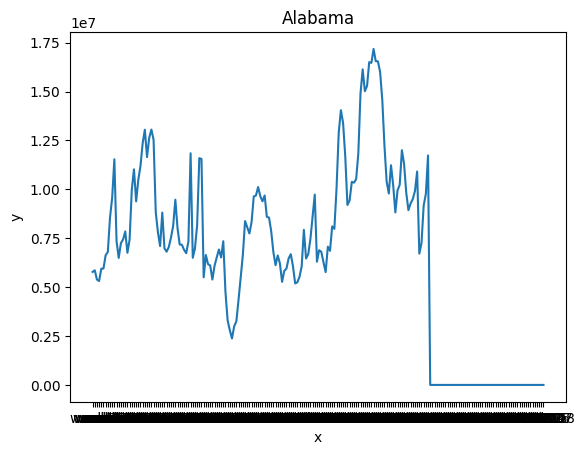

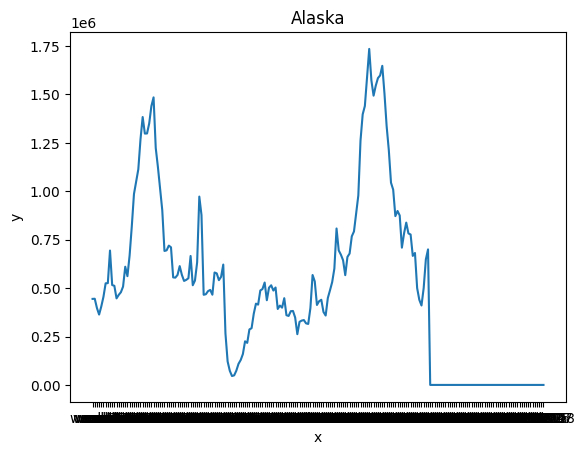

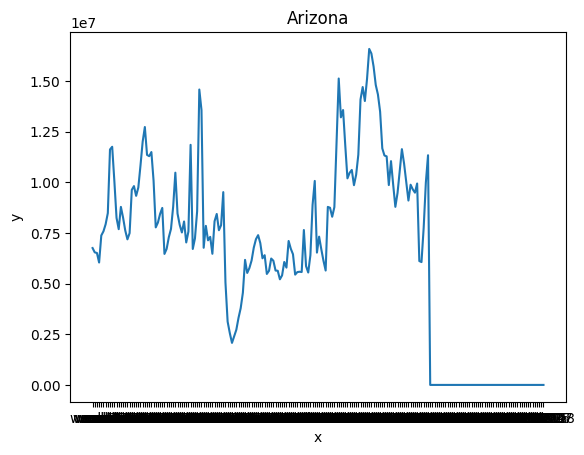

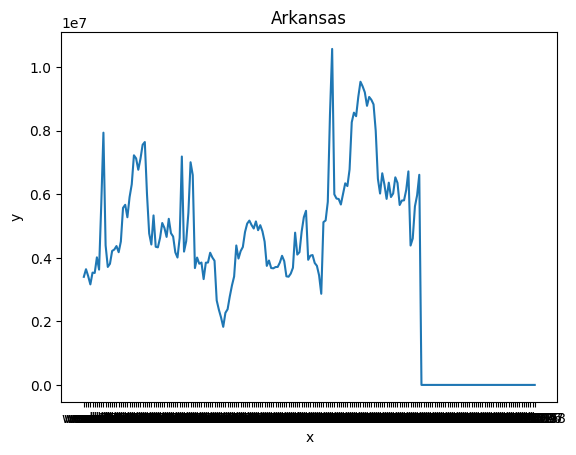

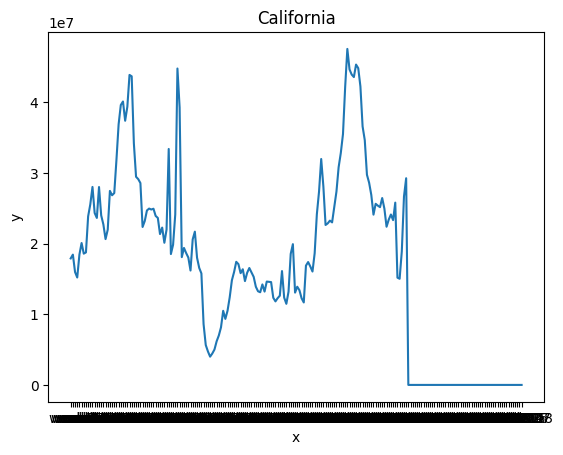

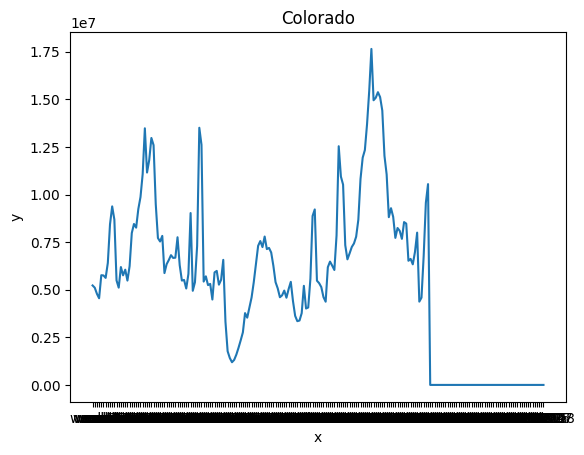

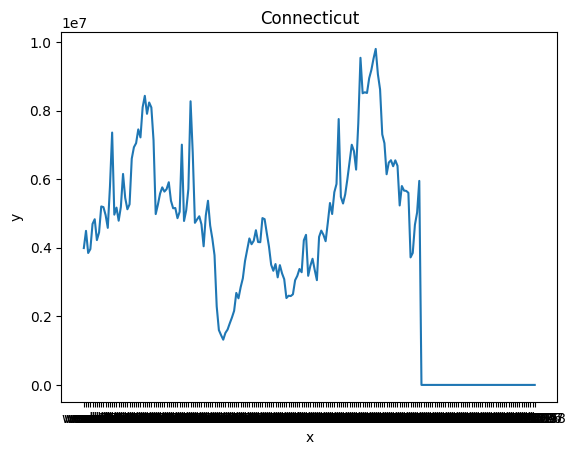

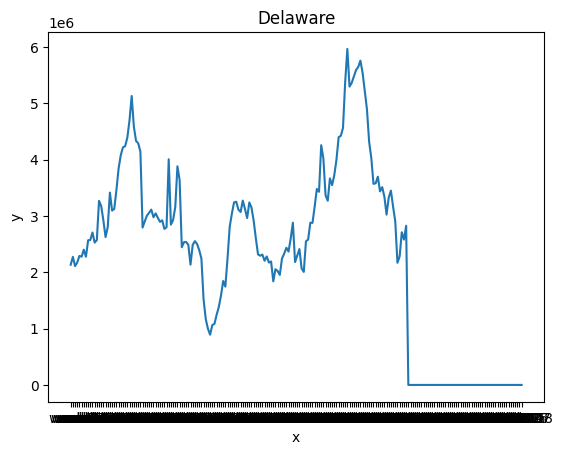

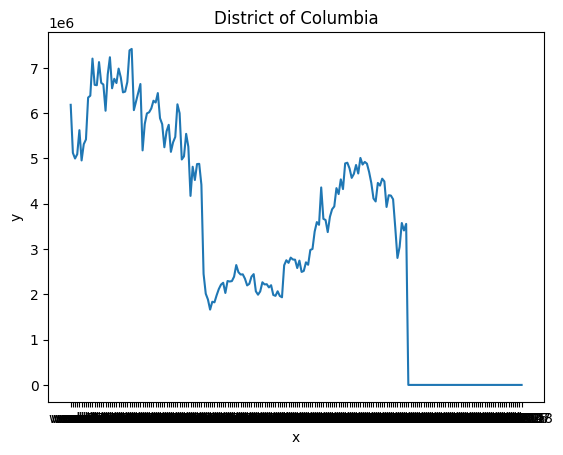

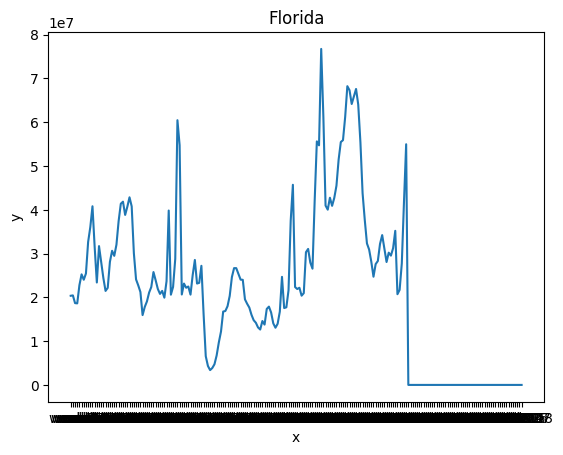

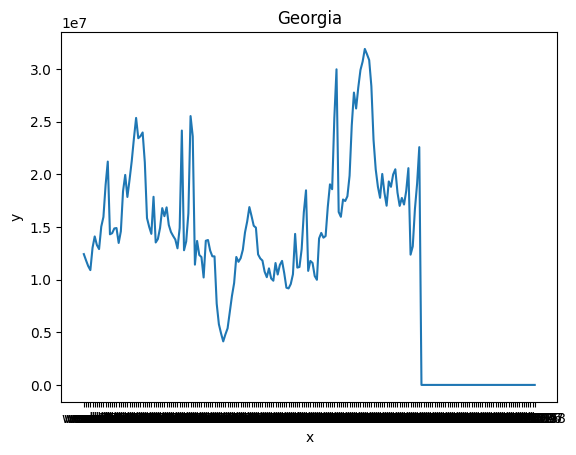

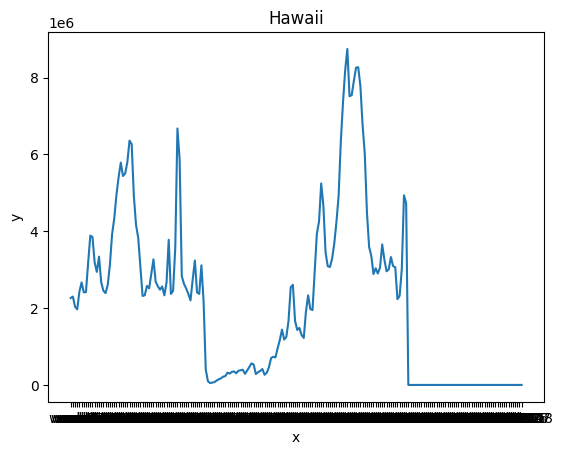

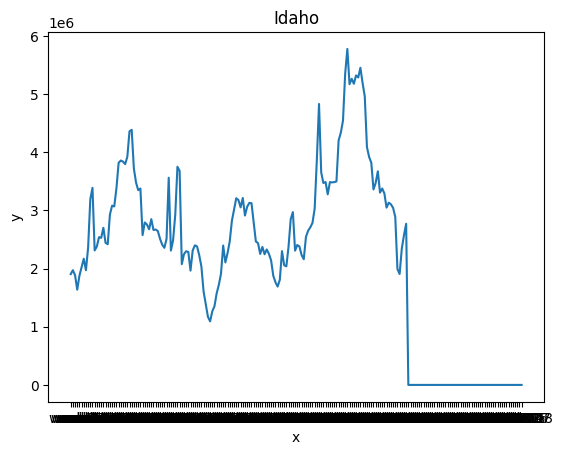

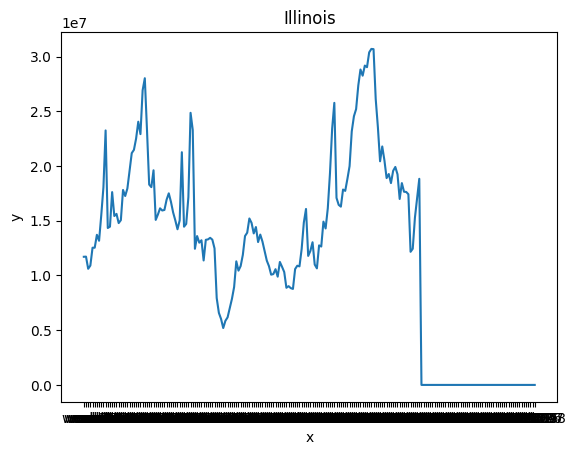

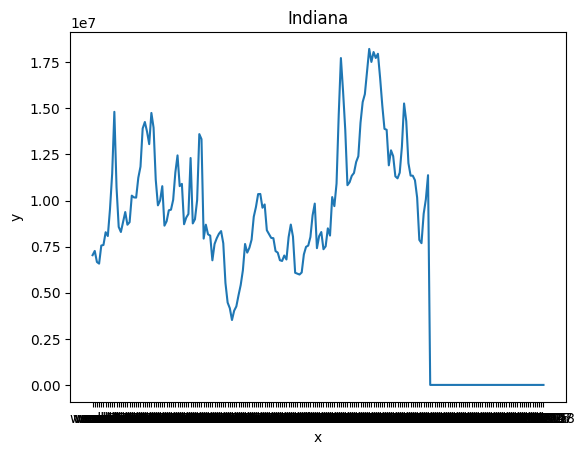

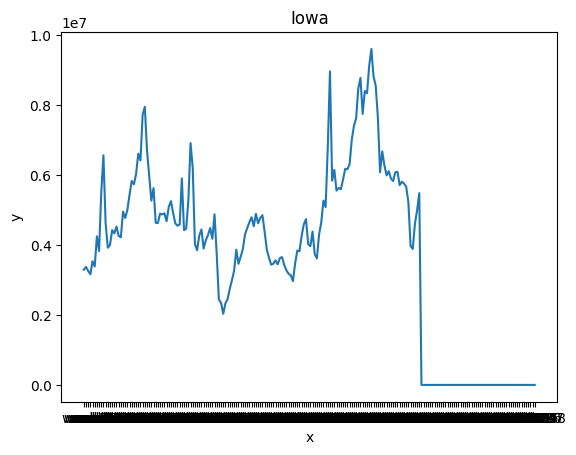

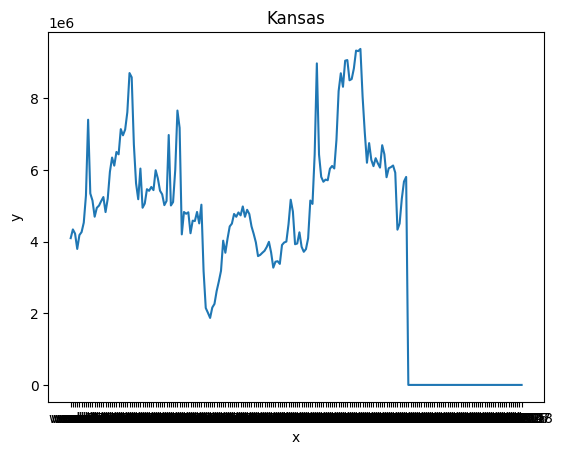

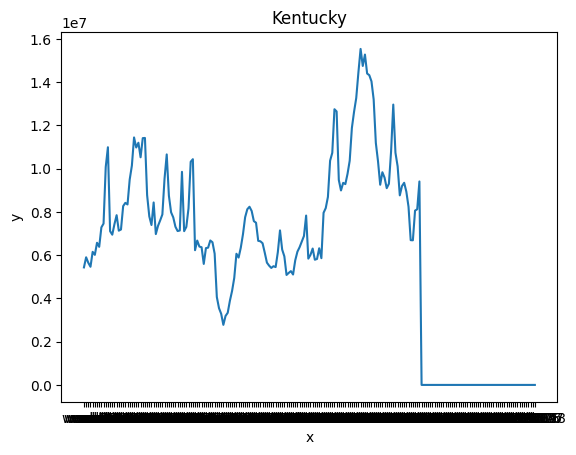

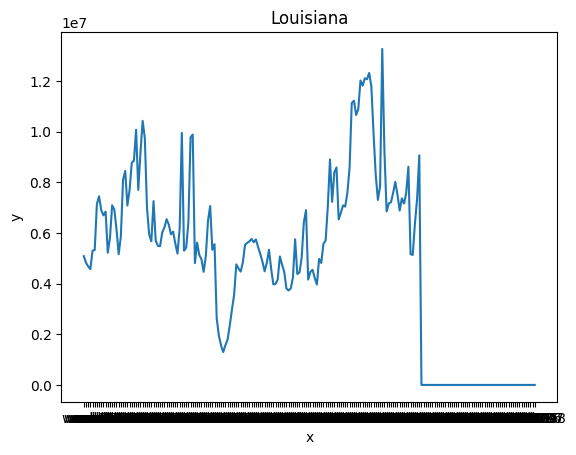

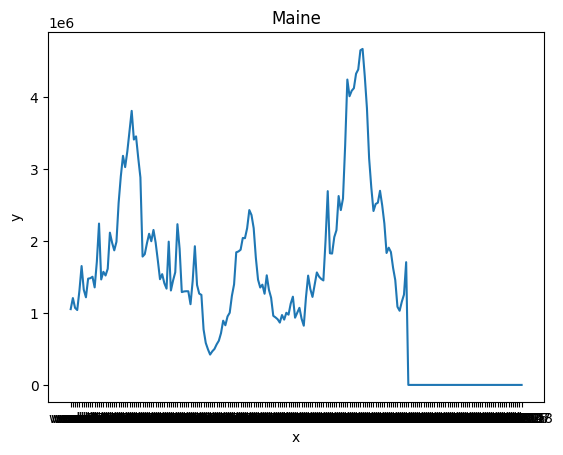

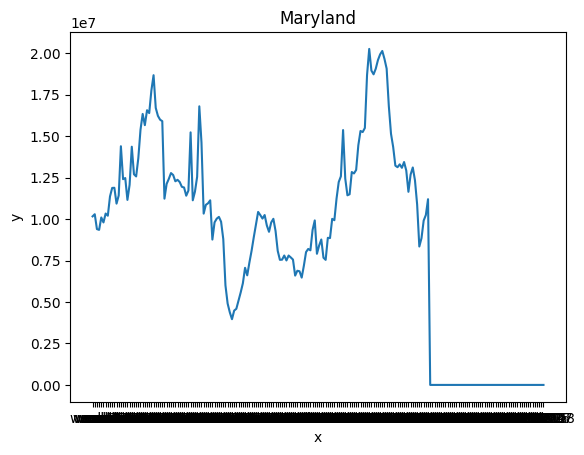

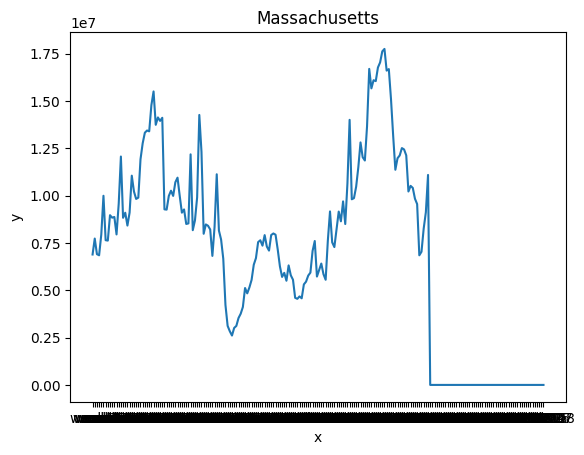

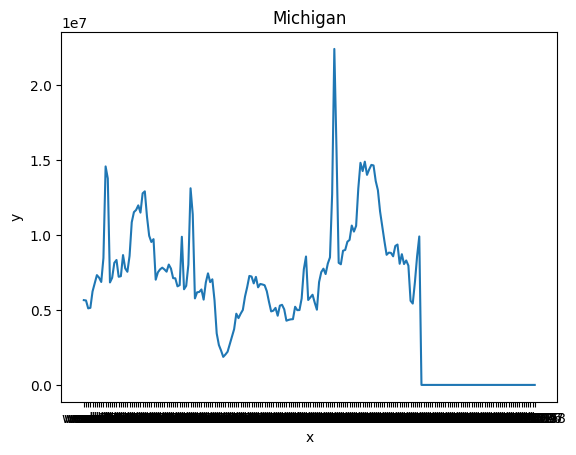

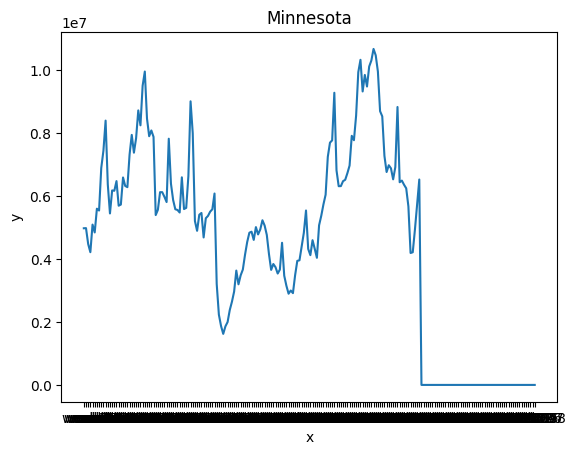

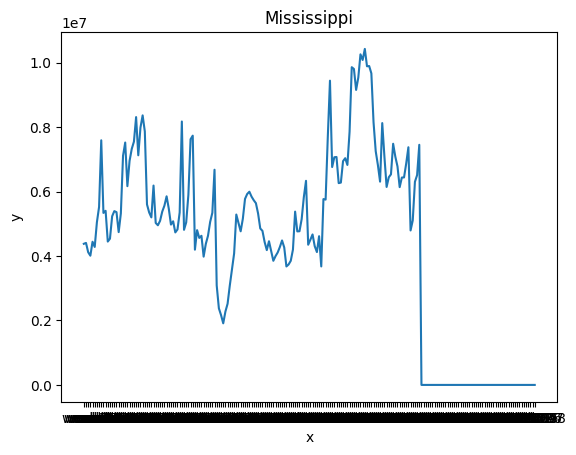

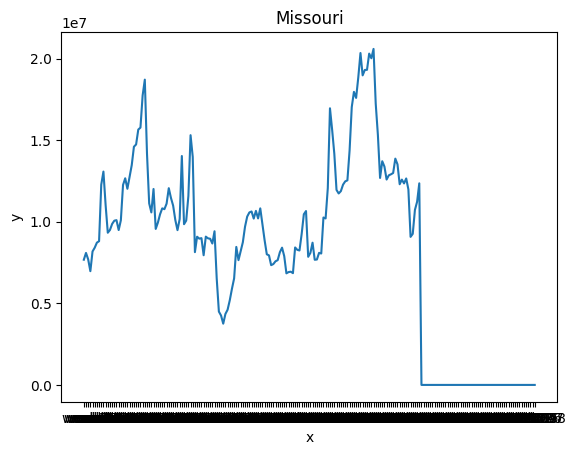

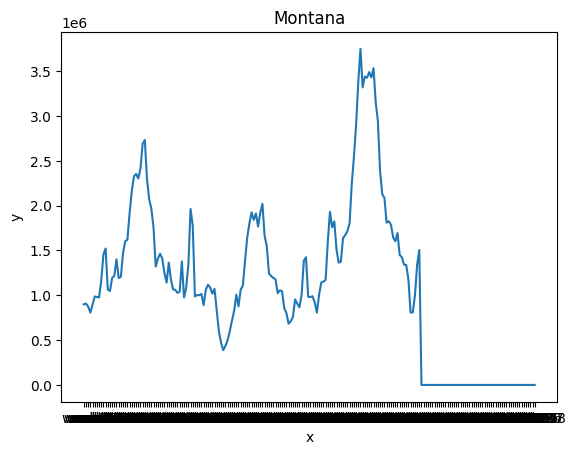

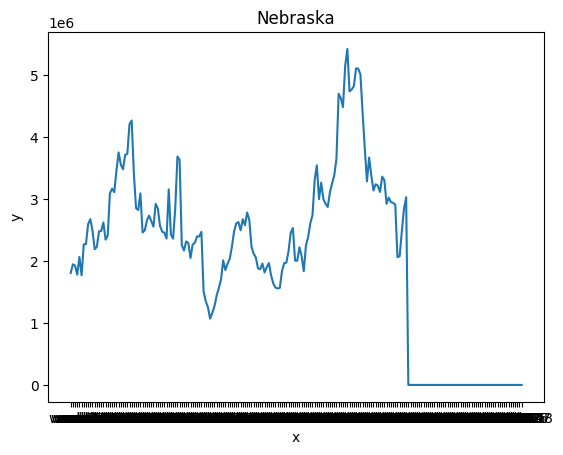

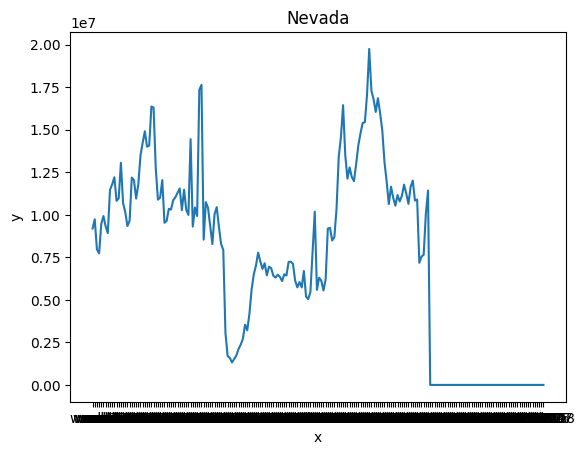

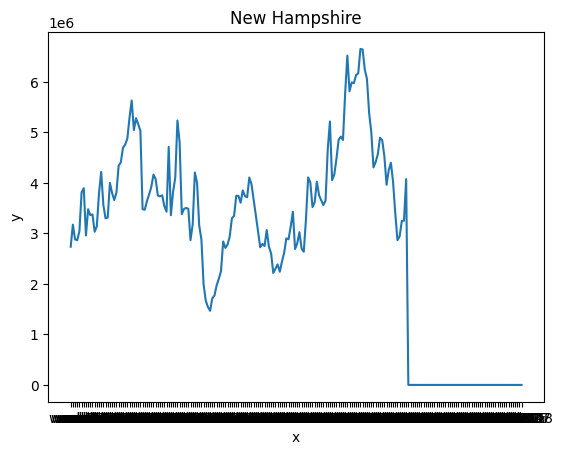

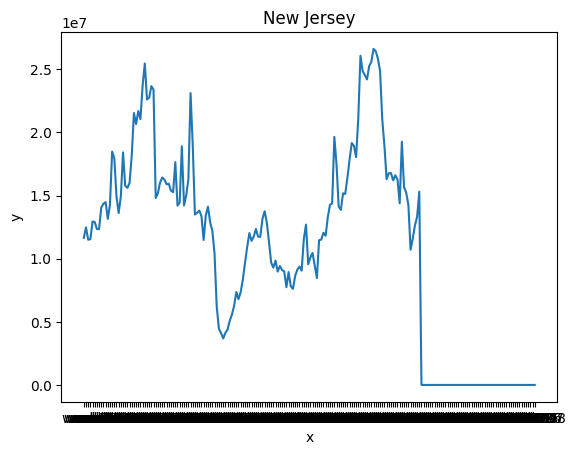

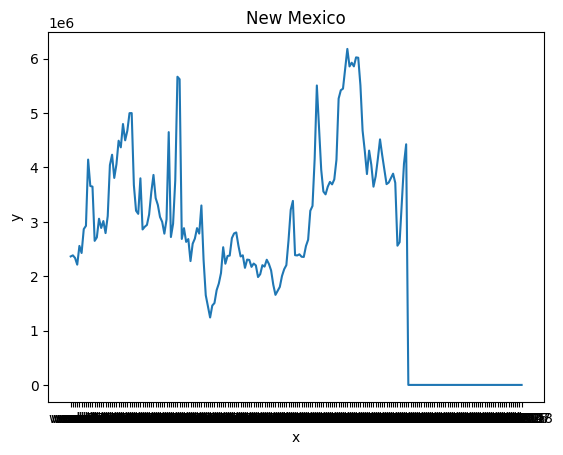

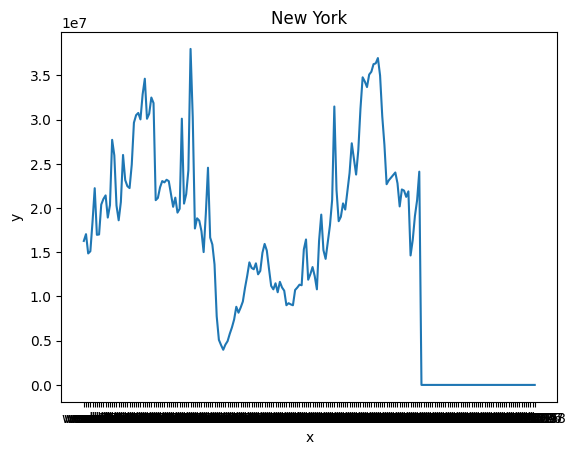

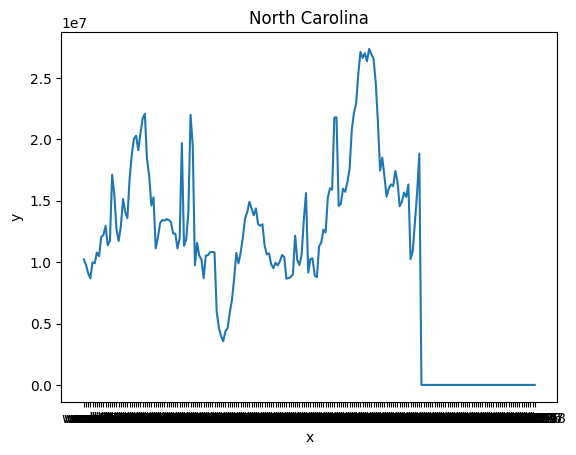

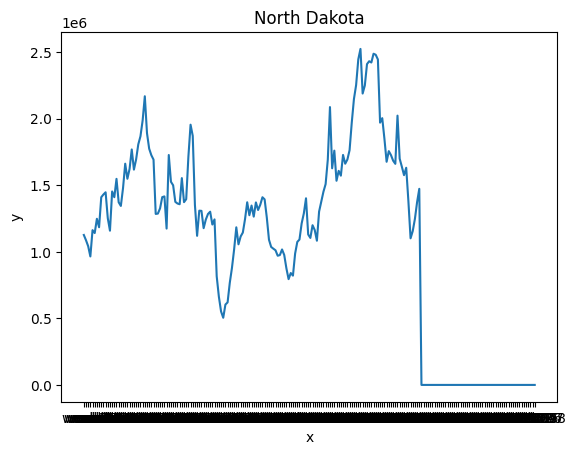

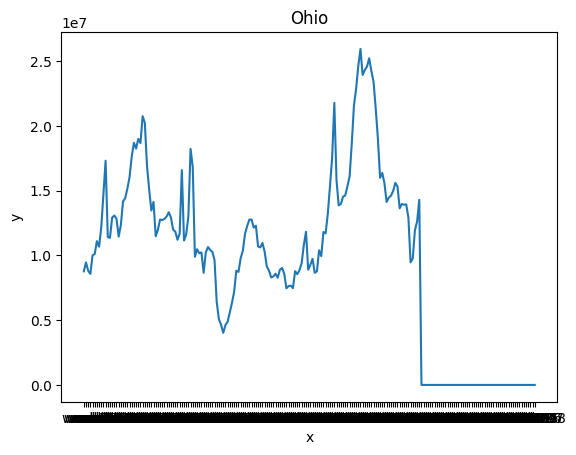

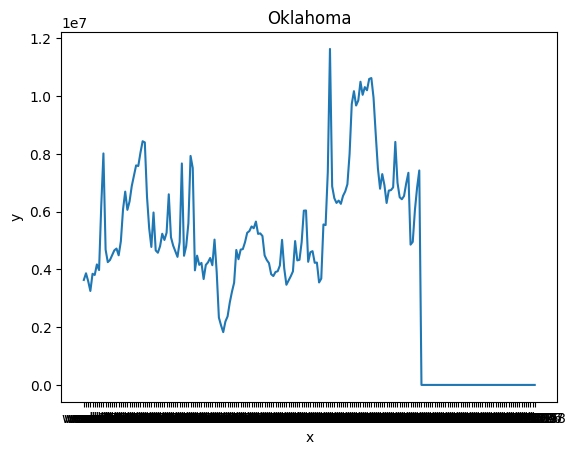

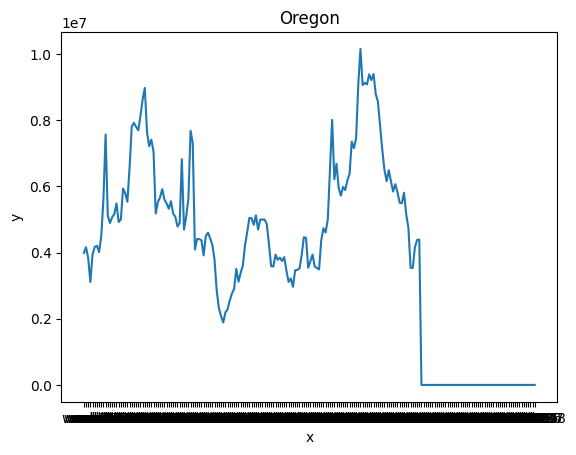

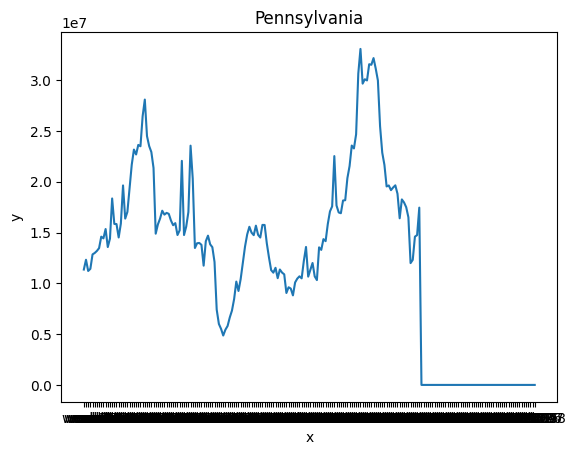

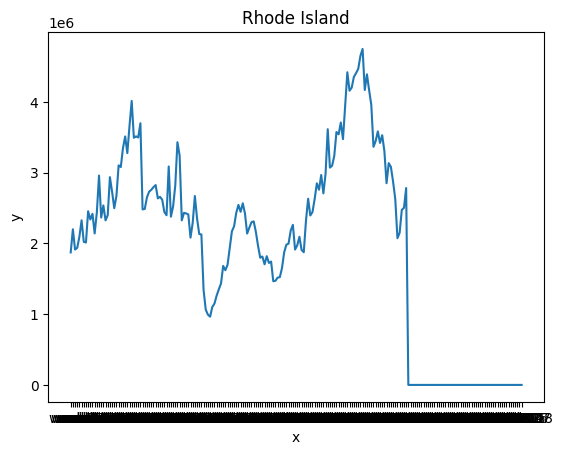

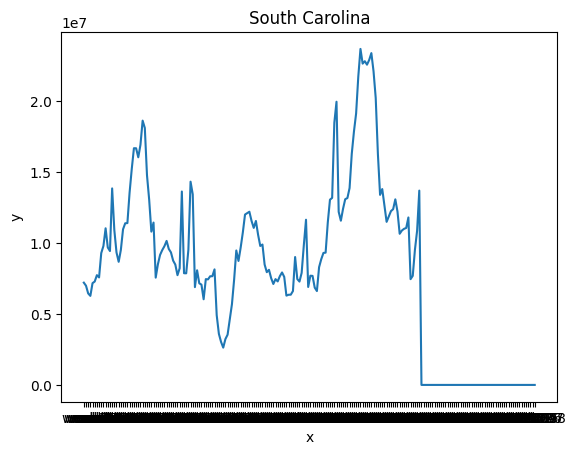

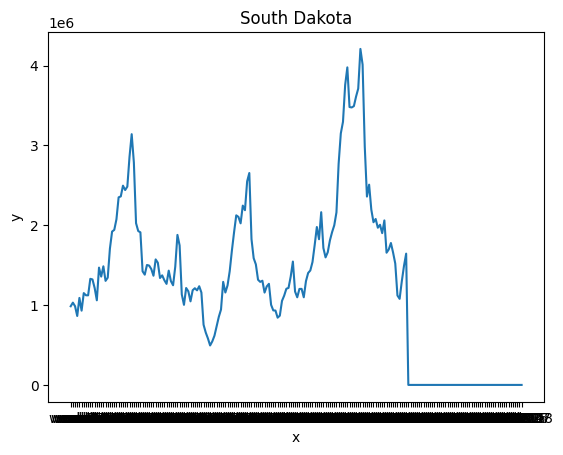

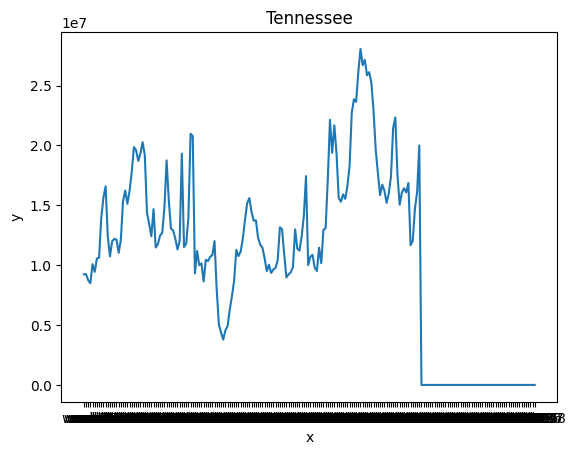

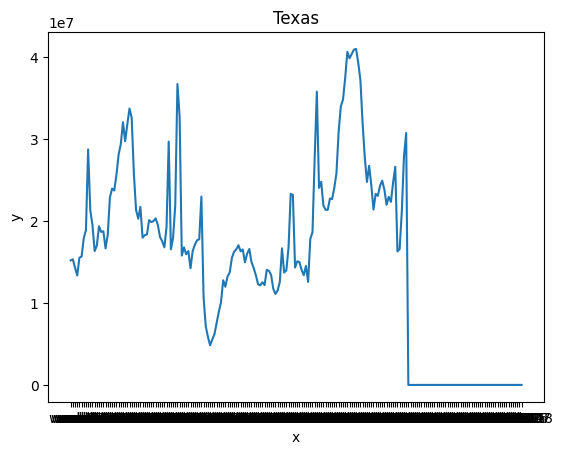

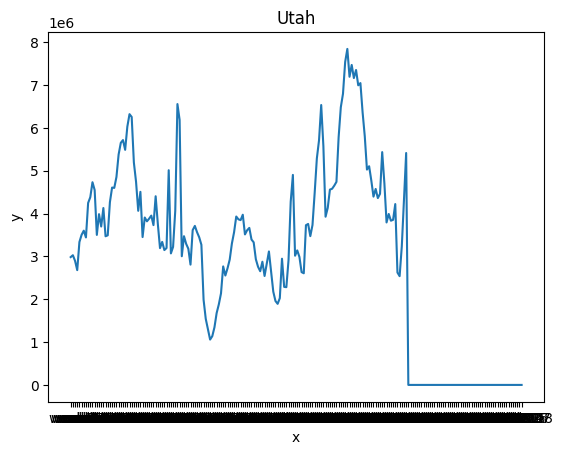

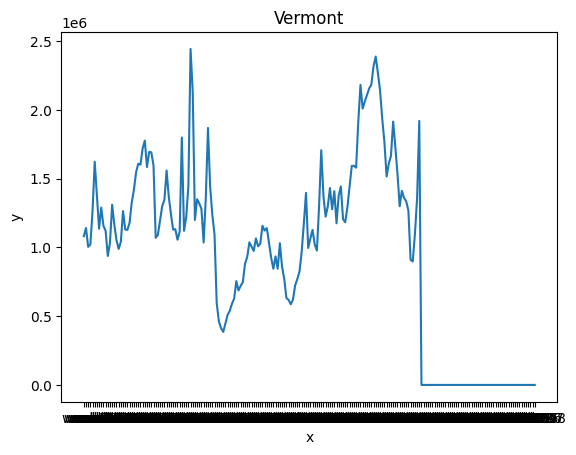

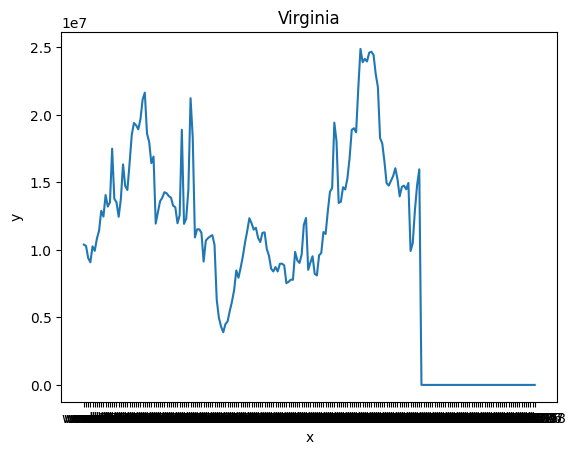

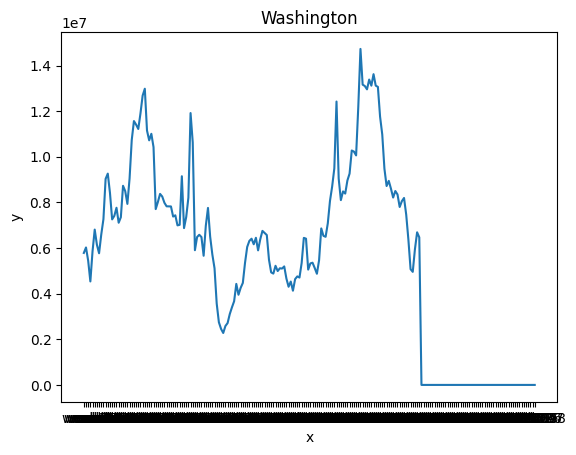

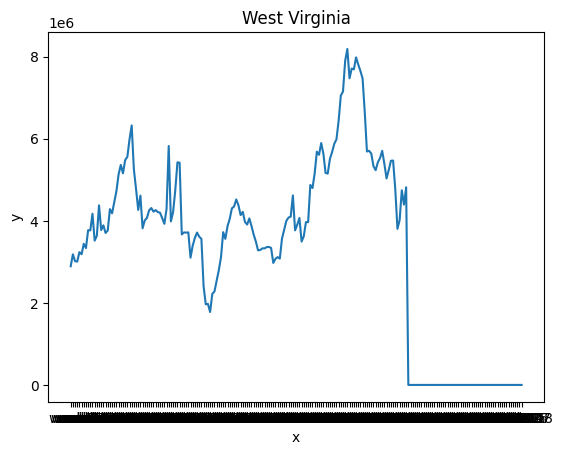

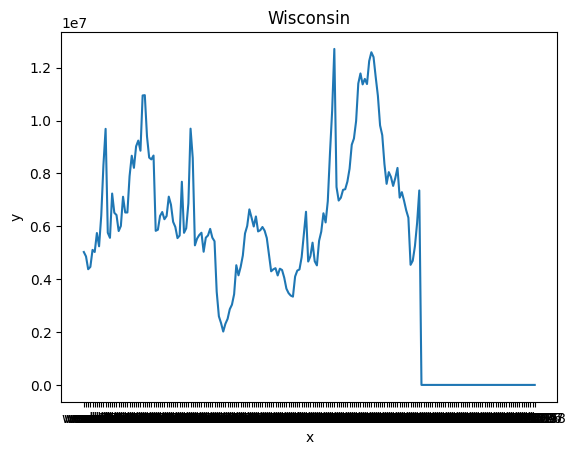

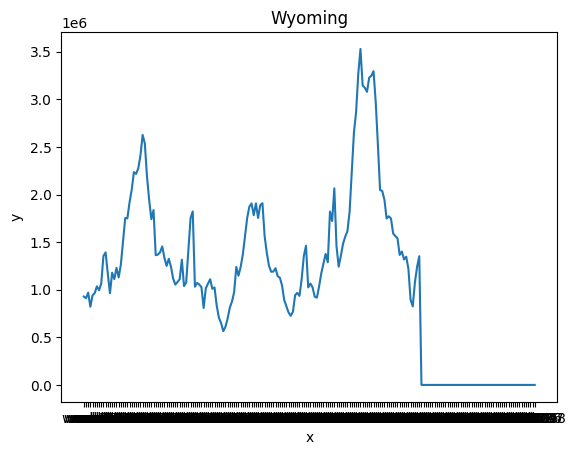

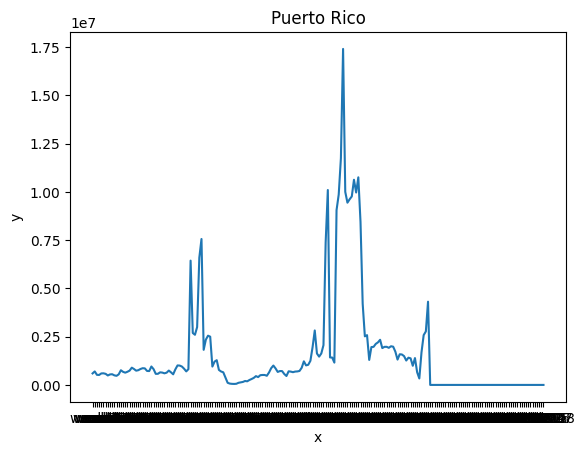

<Figure size 640x480 with 0 Axes>

In [79]:
for sid in state_ids:
    x=list(m_df[m_df["states"]==us_states[sid]].iloc[0].tolist())
    state=x[0]
    data=x[1:]
    
    plt.plot(w,data)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(state)
    
    plt.show()
    #plt.savefig('mobility_statewise_weekly/'+str(us_states[sid])+'.jpg')
    plt.clf()
    

In [82]:
directory = "statewise_covid.csv"

#read the csv file using pandas
covid_cases = pd.read_csv(directory)

In [83]:
len(list(set(covid_cases["state"])))

56

In [84]:
master = {}

master["states"]=states_mob

prev_week = {}
for state in states_mob:
    prev_week[state]=0

date_string = ['2020', '01', '06']

import datetime as dt

file_date = dt.datetime.strptime("_".join(date_string), "%Y_%m_%d")

In [85]:
cases = []
for state in states_mob:
    cases.append(0)

In [86]:
i=0

prev_month=1
w=0


for i in range(1,209):
    
    if i <=52:
        master["week"+str(i)]=cases
        
    else:
        # calculate time interval
        if i==53:
            end_date = file_date
            start_date =  end_date + dt.timedelta(days=-6)
        else:
            start_date = end_date + dt.timedelta(days=1)
            end_date = start_date + dt.timedelta(days=6)
        date_format = "%Y-%m-%d"
        if int(date_string[1])==prev_month:
            w=w+1
            print("yes")
        else:
            prev_month=int(date_string[1])
            w=1
            print("no")
        print(int(date_string[1]),"week : ",w)

        
        # filter covid cases dataframe and sum cases
        interval_cases = covid_cases[(covid_cases["date"] >= str(start_date)) & (covid_cases["date"] < str(end_date))]
        
        cases = []
        for state in states_mob:
            if len(interval_cases[interval_cases["state"]==state])==0:
                cases.append(0)
                
            else:
                p = interval_cases[interval_cases["state"]==state]["cases"].max()-prev_week[state]
                if p>=0:
                    cases.append(interval_cases[interval_cases["state"]==state]["cases"].max()-prev_week[state])
                else:
                    cases.append(p*-1)
                prev_week[state]=interval_cases[interval_cases["state"]==state]["cases"].max()
                
        master["week"+str(i)]=cases
                

yes
1 week :  1
yes
1 week :  2
yes
1 week :  3
yes
1 week :  4
yes
1 week :  5
yes
1 week :  6
yes
1 week :  7
yes
1 week :  8
yes
1 week :  9
yes
1 week :  10
yes
1 week :  11
yes
1 week :  12
yes
1 week :  13
yes
1 week :  14
yes
1 week :  15
yes
1 week :  16
yes
1 week :  17
yes
1 week :  18
yes
1 week :  19
yes
1 week :  20
yes
1 week :  21
yes
1 week :  22
yes
1 week :  23
yes
1 week :  24
yes
1 week :  25
yes
1 week :  26
yes
1 week :  27
yes
1 week :  28
yes
1 week :  29
yes
1 week :  30
yes
1 week :  31
yes
1 week :  32
yes
1 week :  33
yes
1 week :  34
yes
1 week :  35
yes
1 week :  36
yes
1 week :  37
yes
1 week :  38
yes
1 week :  39
yes
1 week :  40
yes
1 week :  41
yes
1 week :  42
yes
1 week :  43
yes
1 week :  44
yes
1 week :  45
yes
1 week :  46
yes
1 week :  47
yes
1 week :  48
yes
1 week :  49
yes
1 week :  50
yes
1 week :  51
yes
1 week :  52
yes
1 week :  53
yes
1 week :  54
yes
1 week :  55
yes
1 week :  56
yes
1 week :  57
yes
1 week :  58
yes
1 week :  59
yes
1 

In [87]:
master

{'states': ['Alabama',
  'Alaska',
  'Arizona',
  'Arkansas',
  'California',
  'Colorado',
  'Connecticut',
  'Delaware',
  'District of Columbia',
  'Florida',
  'Georgia',
  'Hawaii',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'Kansas',
  'Kentucky',
  'Louisiana',
  'Maine',
  'Maryland',
  'Massachusetts',
  'Michigan',
  'Minnesota',
  'Mississippi',
  'Missouri',
  'Montana',
  'Nebraska',
  'Nevada',
  'New Hampshire',
  'New Jersey',
  'New Mexico',
  'New York',
  'North Carolina',
  'North Dakota',
  'Ohio',
  'Oklahoma',
  'Oregon',
  'Pennsylvania',
  'Rhode Island',
  'South Carolina',
  'South Dakota',
  'Tennessee',
  'Texas',
  'Utah',
  'Vermont',
  'Virginia',
  'Washington',
  'West Virginia',
  'Wisconsin',
  'Wyoming',
  'Puerto Rico'],
 'week1': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [88]:
master_df=pd.DataFrame(master)

In [89]:
master_df

states  week1  week2  week3  week4  week5  week6  week7  \
0                Alabama      0      0      0      0      0      0      0   
1                 Alaska      0      0      0      0      0      0      0   
2                Arizona      0      0      0      0      0      0      0   
3               Arkansas      0      0      0      0      0      0      0   
4             California      0      0      0      0      0      0      0   
5               Colorado      0      0      0      0      0      0      0   
6            Connecticut      0      0      0      0      0      0      0   
7               Delaware      0      0      0      0      0      0      0   
8   District of Columbia      0      0      0      0      0      0      0   
9                Florida      0      0      0      0      0      0      0   
10               Georgia      0      0      0      0      0      0      0   
11                Hawaii      0      0      0      0      0      0      0   
12                 Idaho      0      0      0      0      0      0      0   
13              Illinois      0      0      0      0      0      0      0   
14               Indiana      0      0      0      0      0      0      0   
15                  Iowa      0      0      0      0      0      0      0   
16                Kansas      0      0      0      0      0      0      0   
17              Kentucky      0      0      0      0      0      0      0   
18             Louisiana      0      0      0      0      0      0      0   
19                 Maine      0      0      0      0      0      0      0   
20              Maryland      0      0      0      0      0      0      0   
21         Massachusetts      0      0      0      0      0      0      0   
22              Michigan      0      0      0      0      0      0      0   
23             Minnesota      0      0      0      0      0      0      0   
24           Mississippi      0      0      0      0      0      0      0   
25              Missouri      0      0      0      0      0      0      0   
26               Montana      0      0      0      0      0      0      0   
27              Nebraska      0      0      0      0      0      0      0   
28                Nevada      0      0      0      0      0      0      0   
29         New Hampshire      0      0      0      0      0      0      0   
30            New Jersey      0      0      0      0      0      0      0   
31            New Mexico      0      0      0      0      0      0      0   
32              New York      0      0      0      0      0      0      0   
33        North Carolina      0      0      0      0      0      0      0   
34          North Dakota      0      0      0      0      0      0      0   
35                  Ohio      0      0      0      0      0      0      0   
36              Oklahoma      0      0      0      0      0      0      0   
37                Oregon      0      0      0      0      0      0      0   
38          Pennsylvania      0      0      0      0      0      0      0   
39          Rhode Island      0      0      0      0      0      0      0   
40        South Carolina      0      0      0      0      0      0      0   
41          South Dakota      0      0      0      0      0      0      0   
42             Tennessee      0      0      0      0      0      0      0   
43                 Texas      0      0      0      0      0      0      0   
44                  Utah      0      0      0      0      0      0      0   
45               Vermont      0      0      0      0      0      0      0   
46              Virginia      0      0      0      0      0      0      0   
47            Washington      0      0      0      0      0      0      0   
48         West Virginia      0      0      0      0      0      0      0   
49             Wisconsin      0      0      0      0      0      0      0   
50               Wyoming      0      0      0      0      0      0      0   
51           P

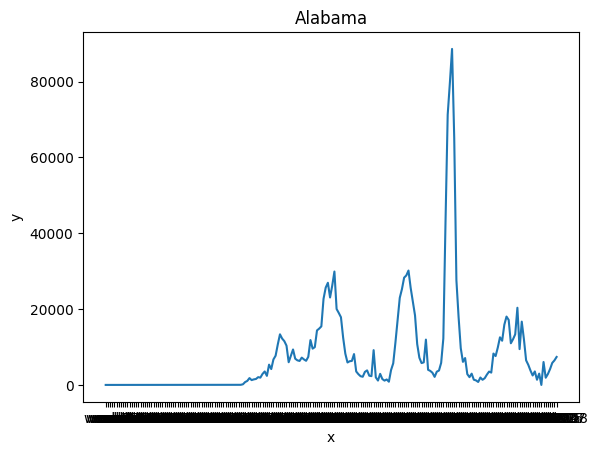

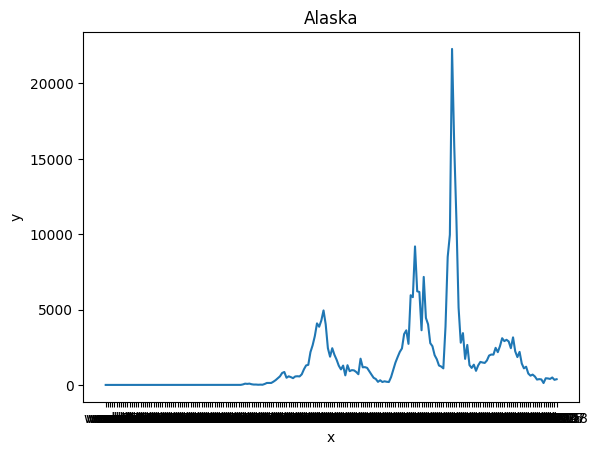

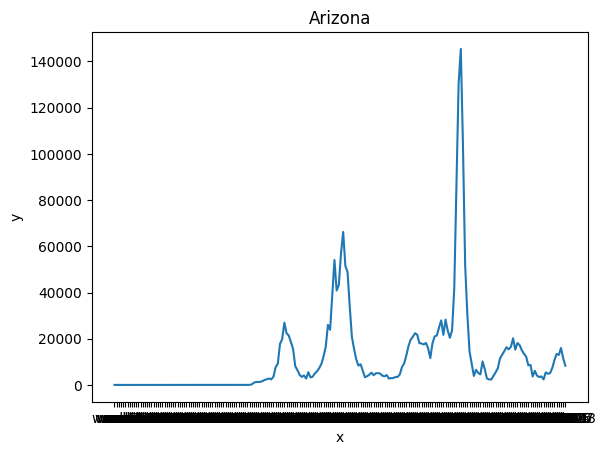

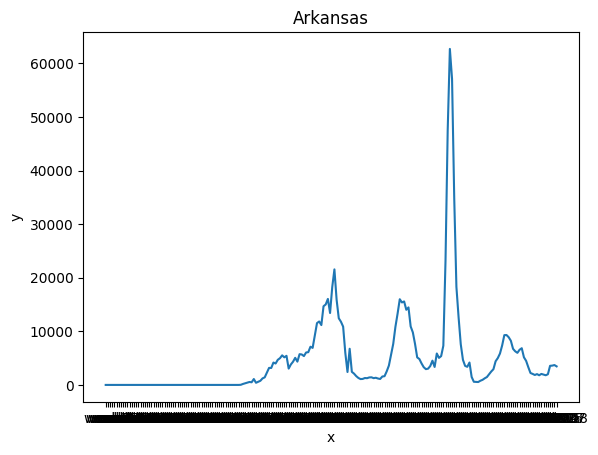

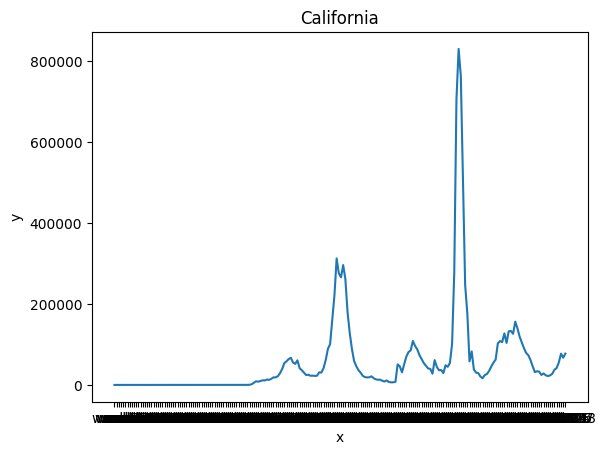

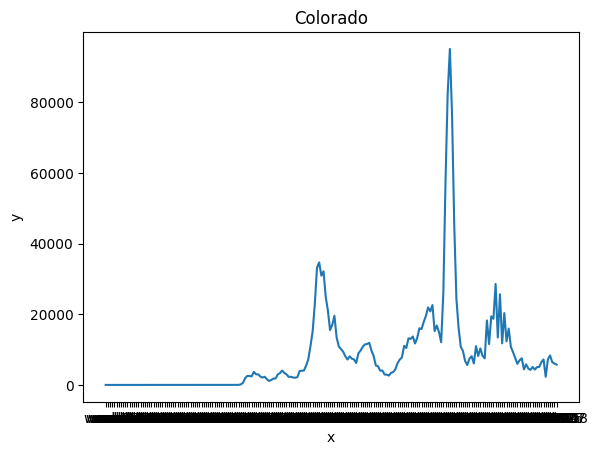

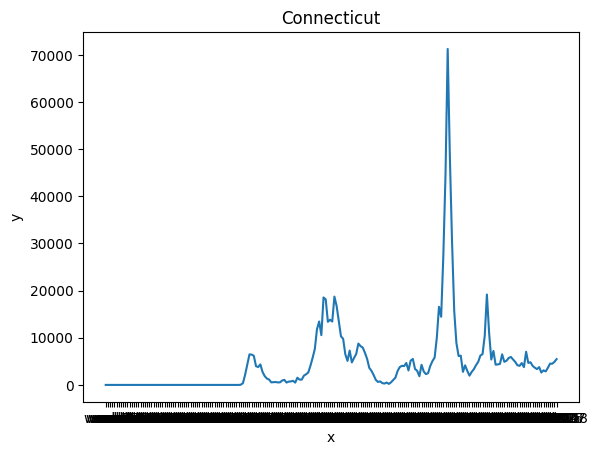

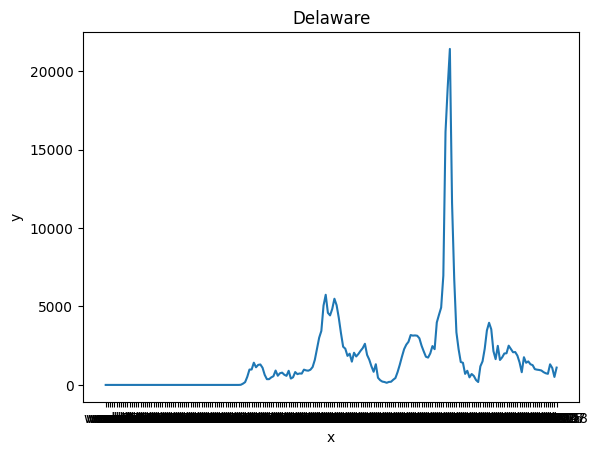

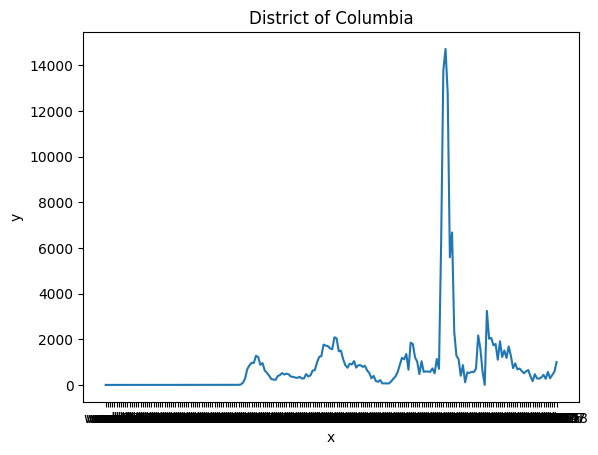

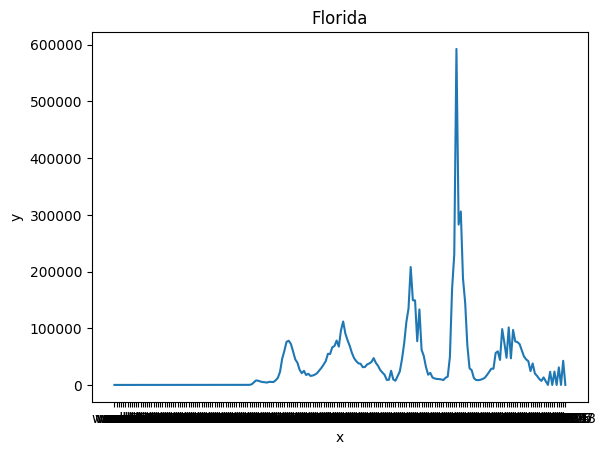

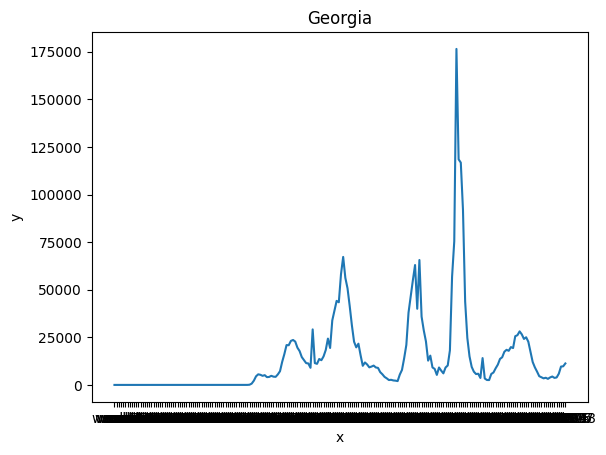

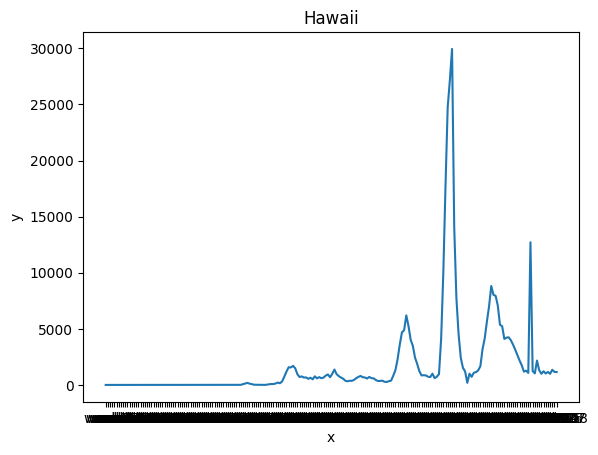

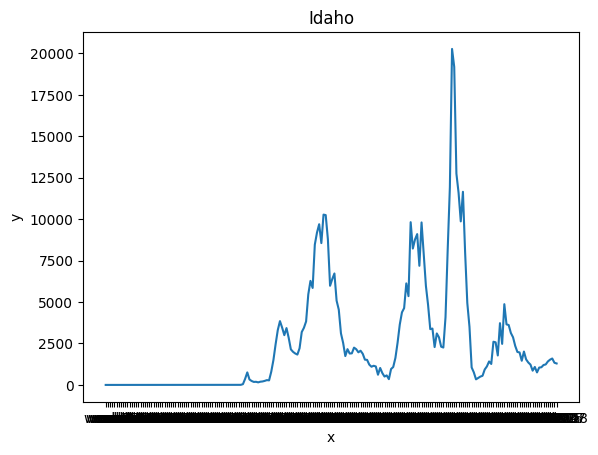

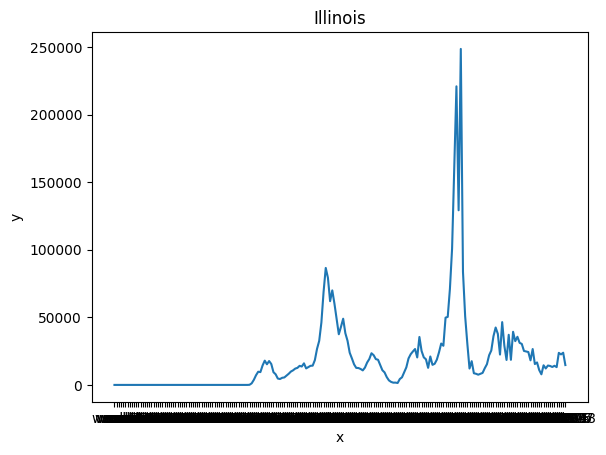

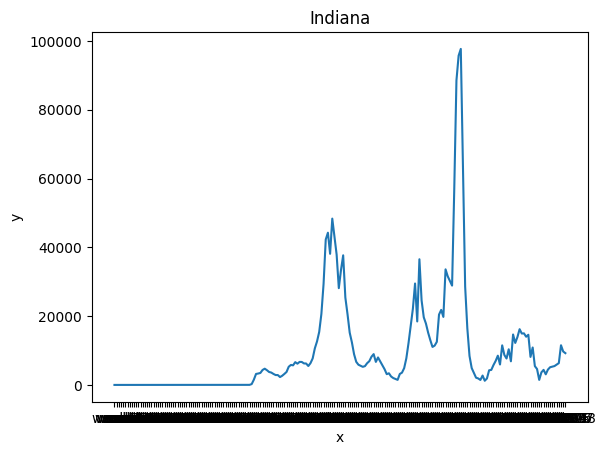

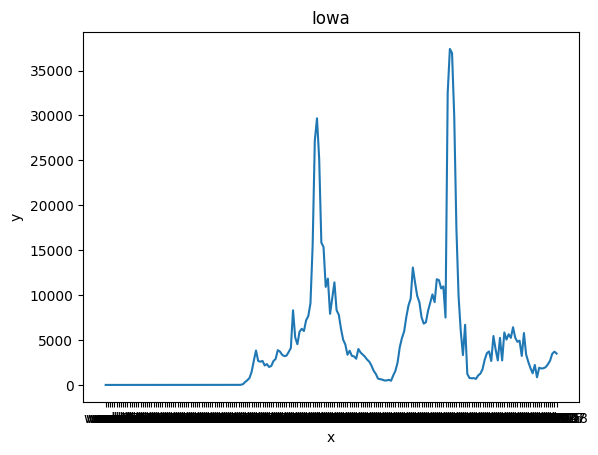

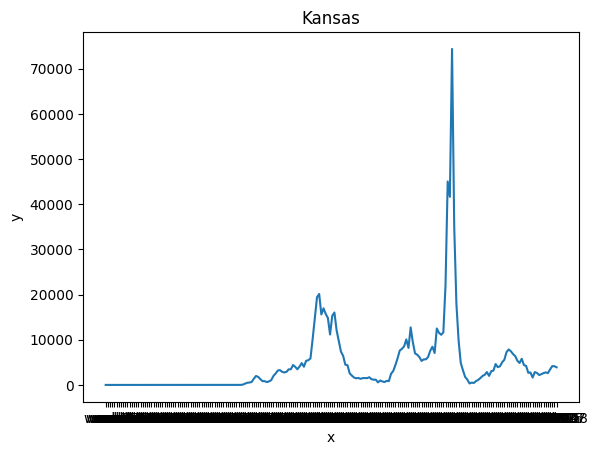

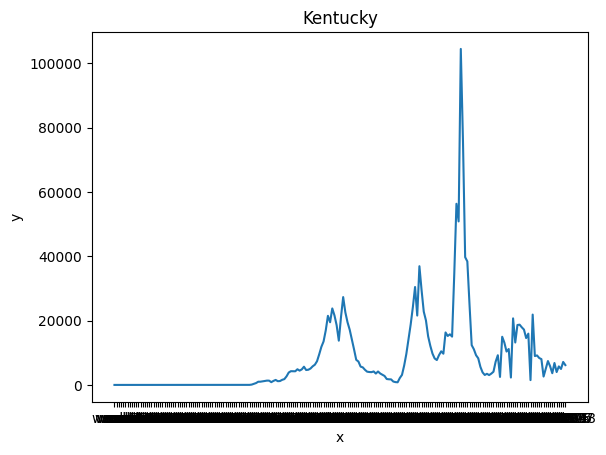

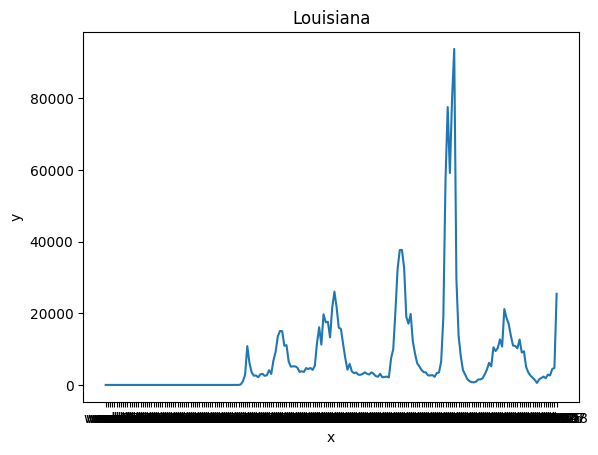

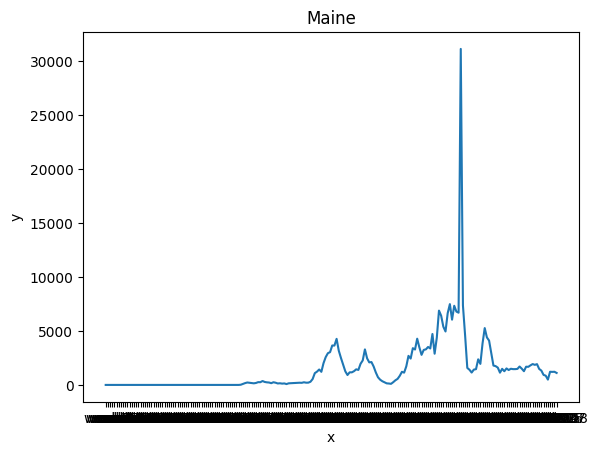

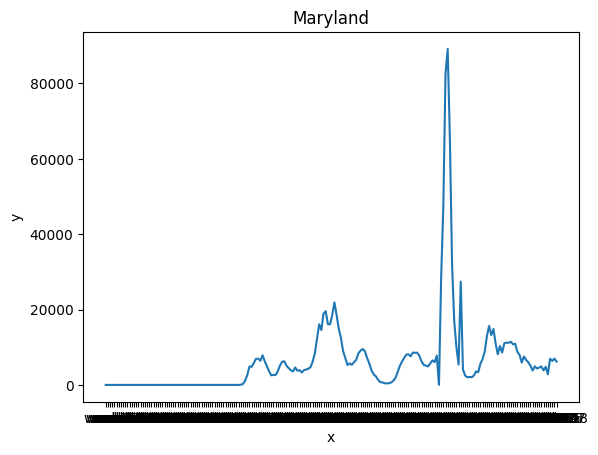

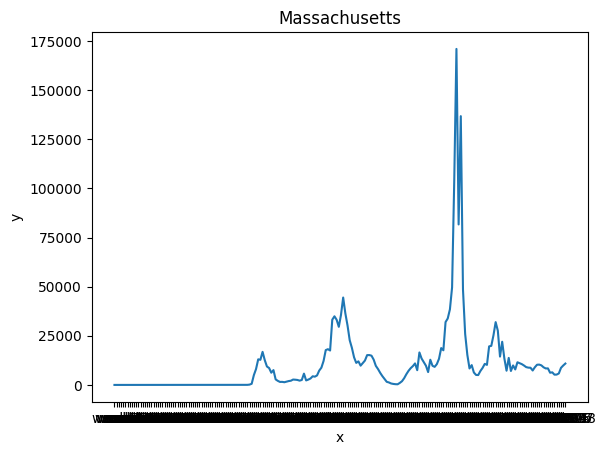

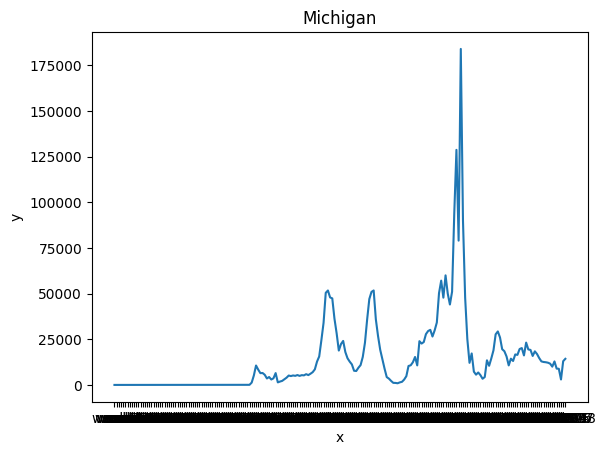

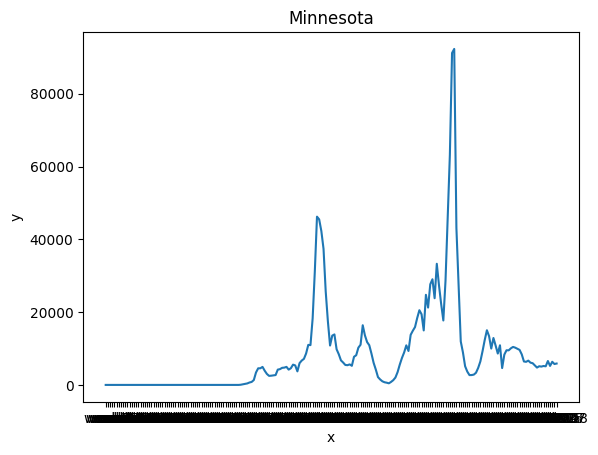

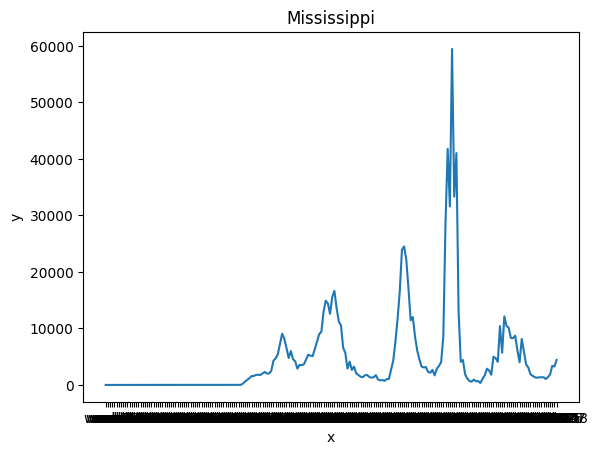

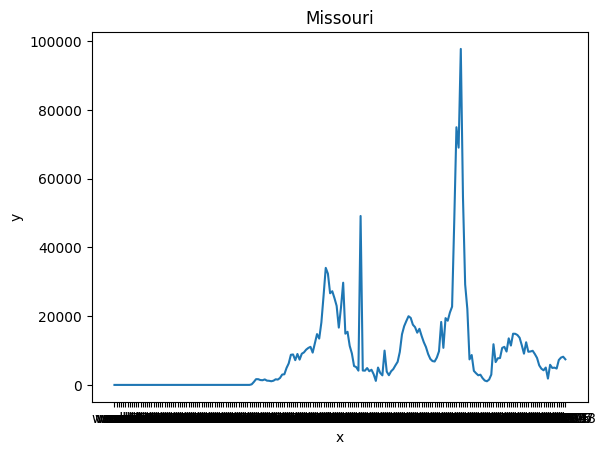

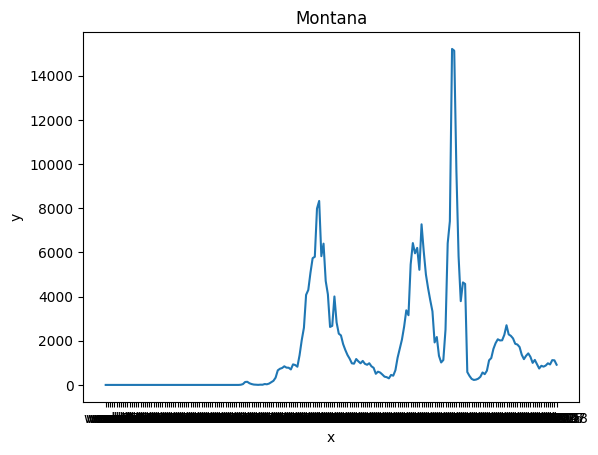

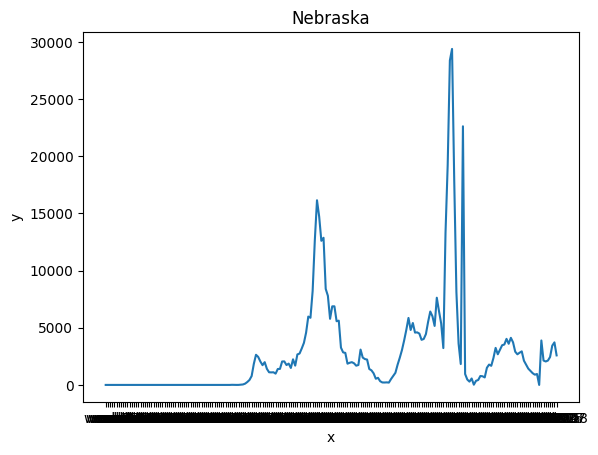

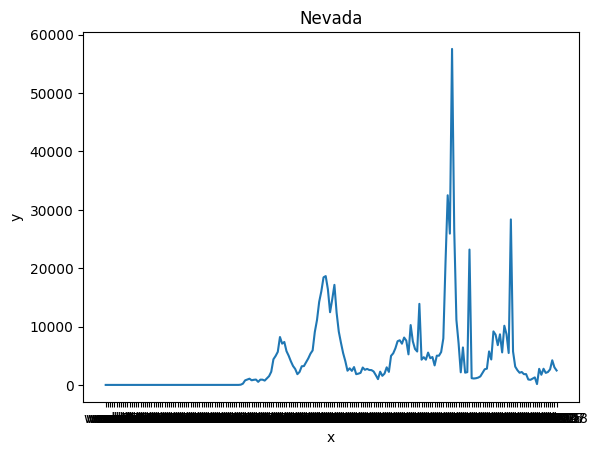

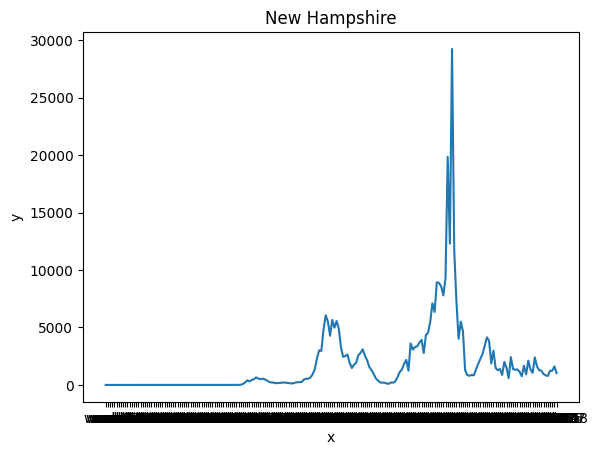

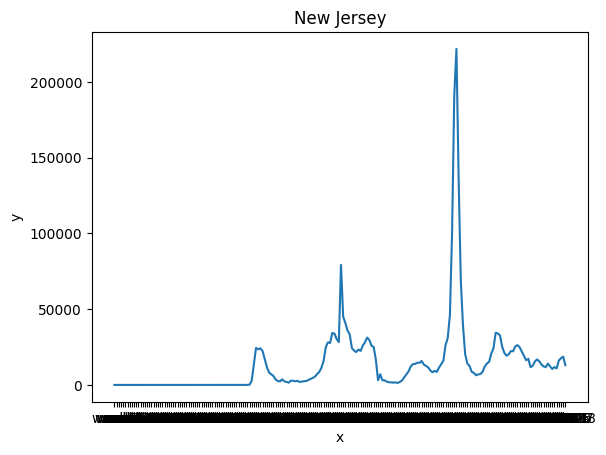

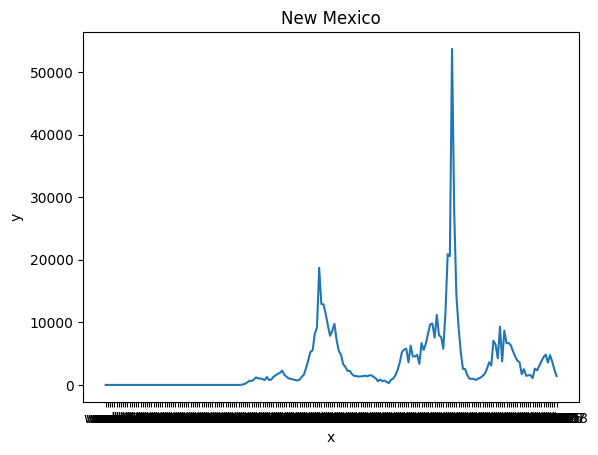

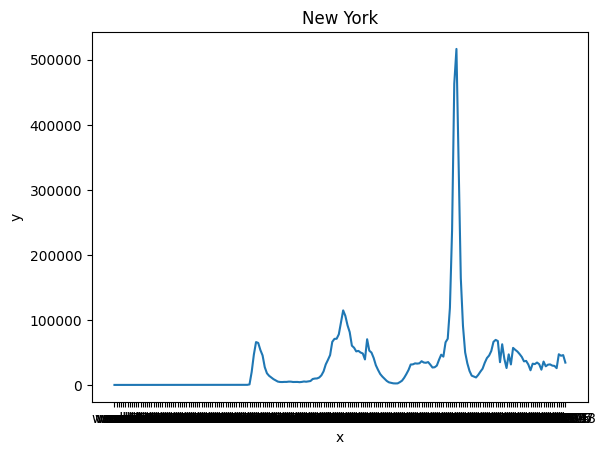

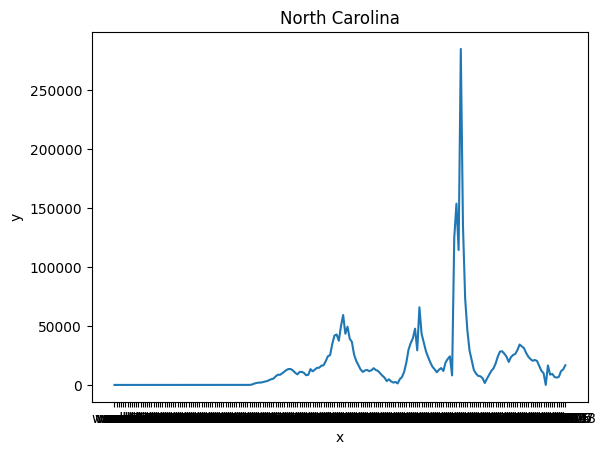

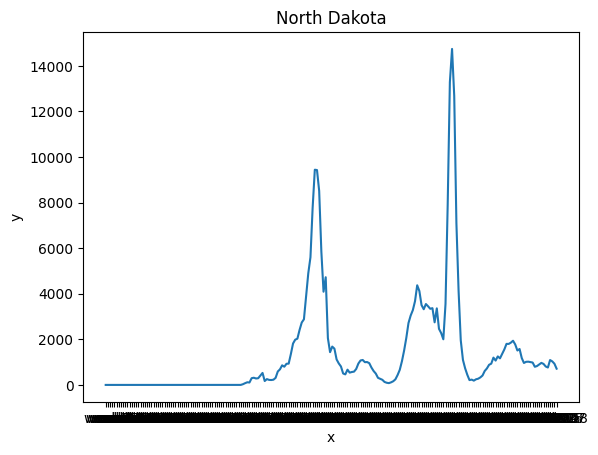

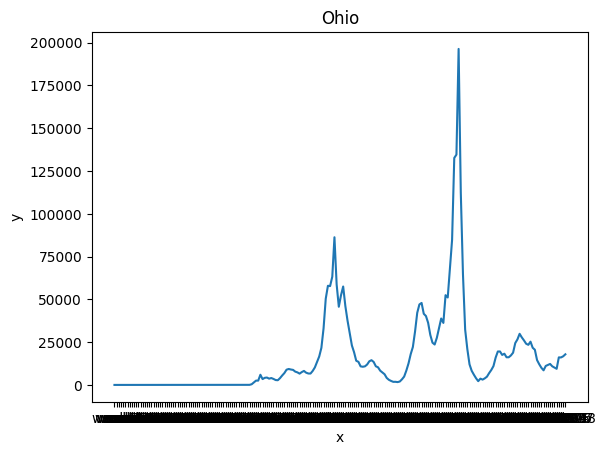

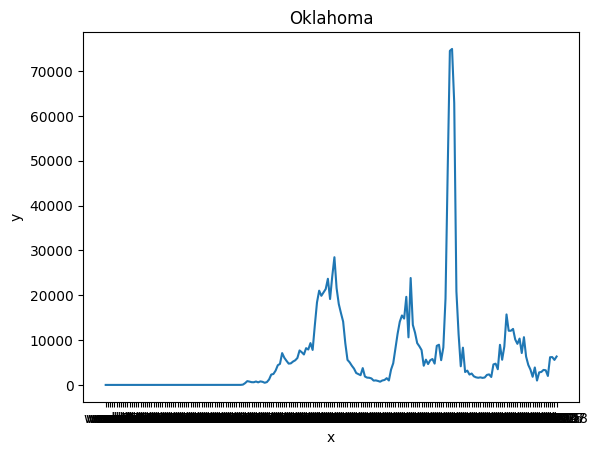

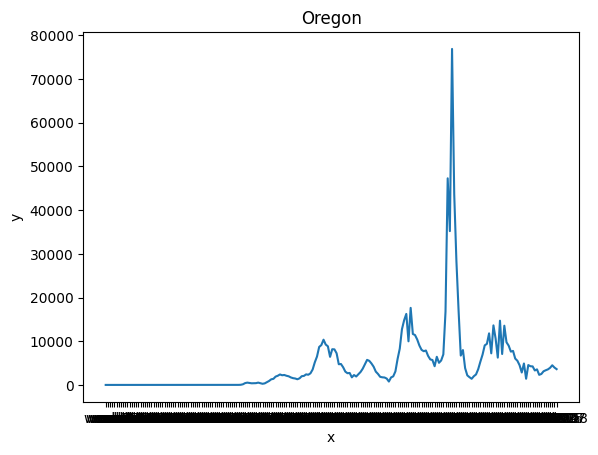

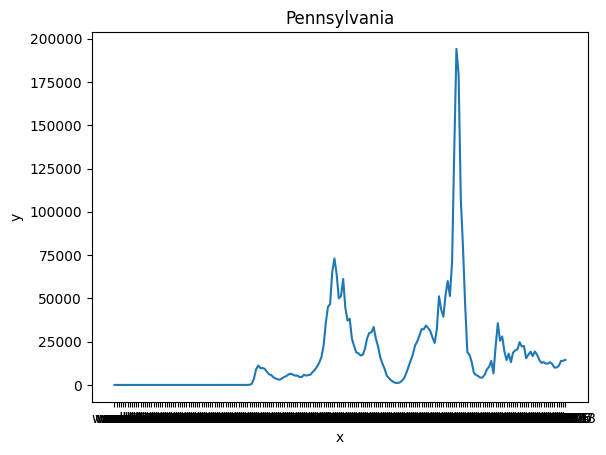

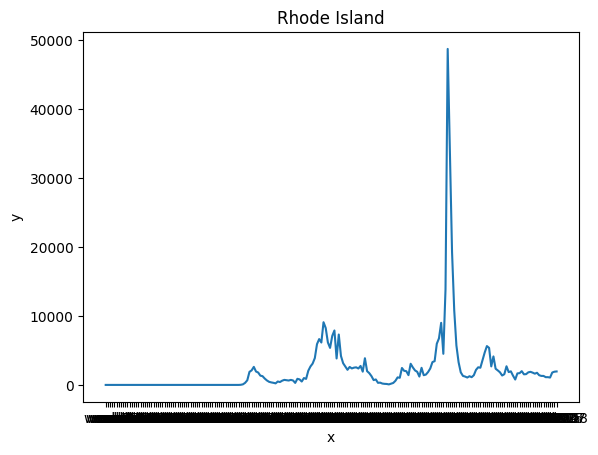

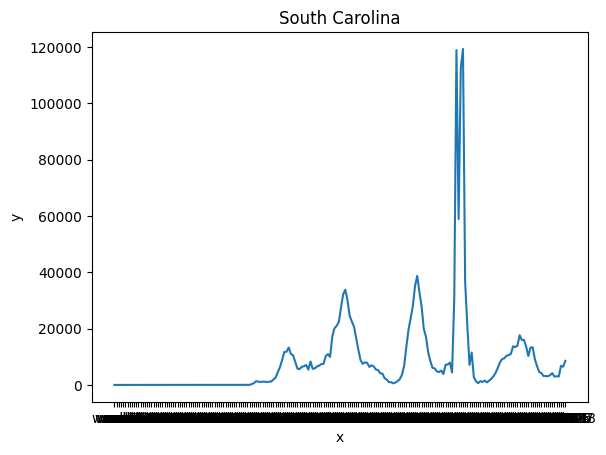

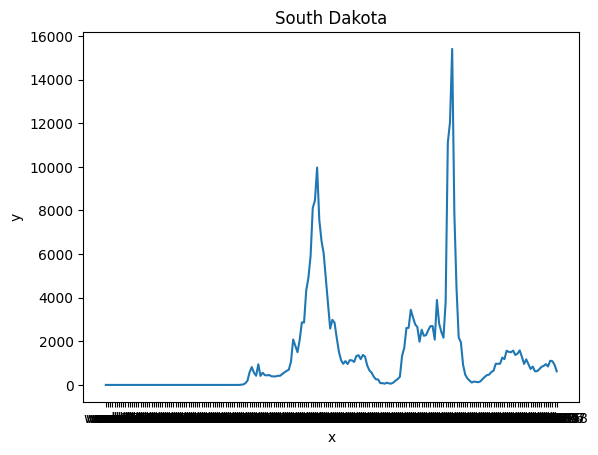

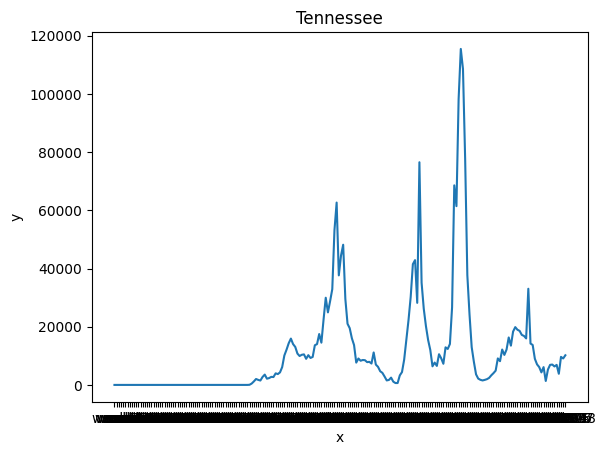

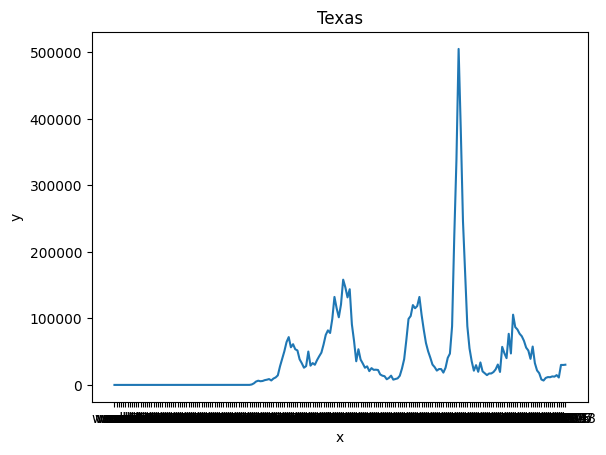

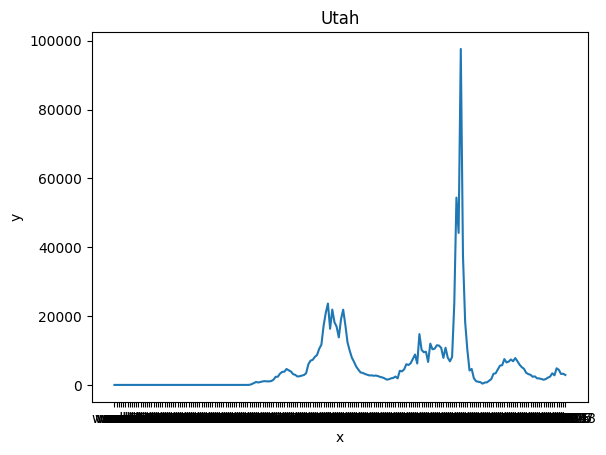

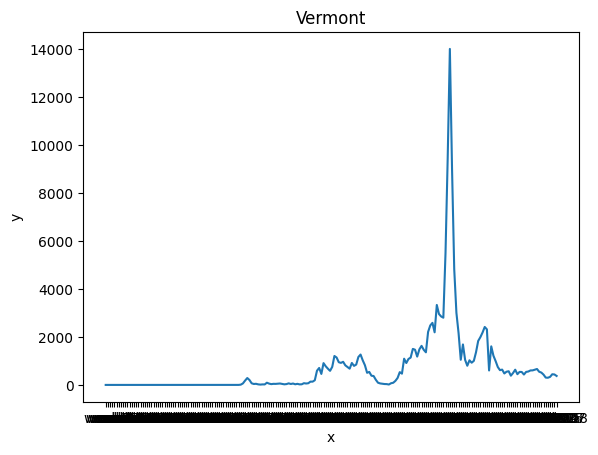

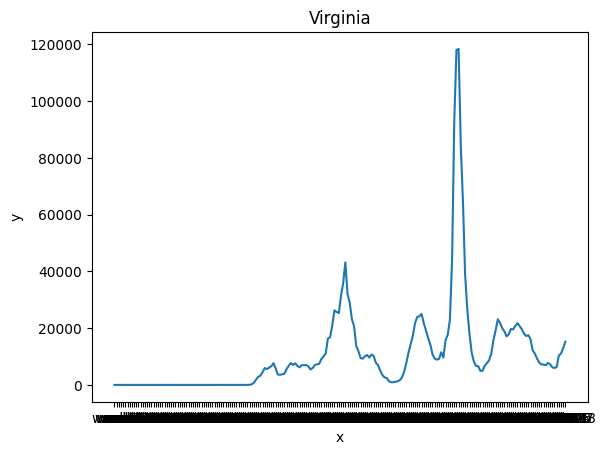

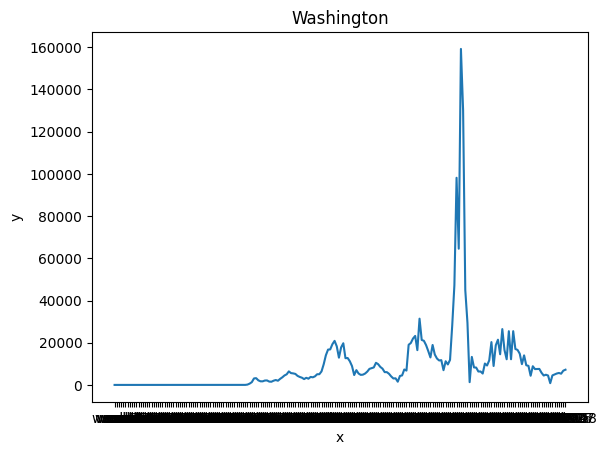

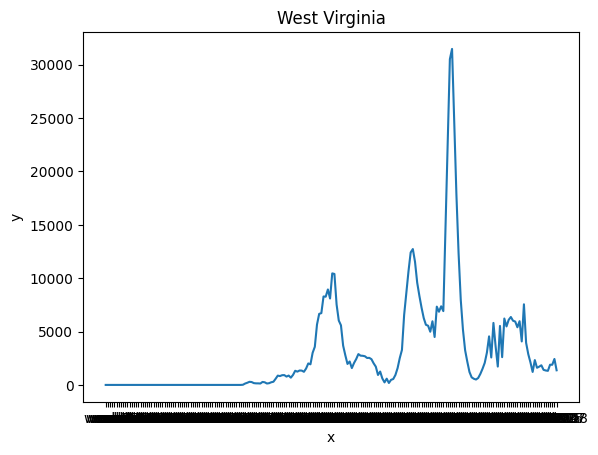

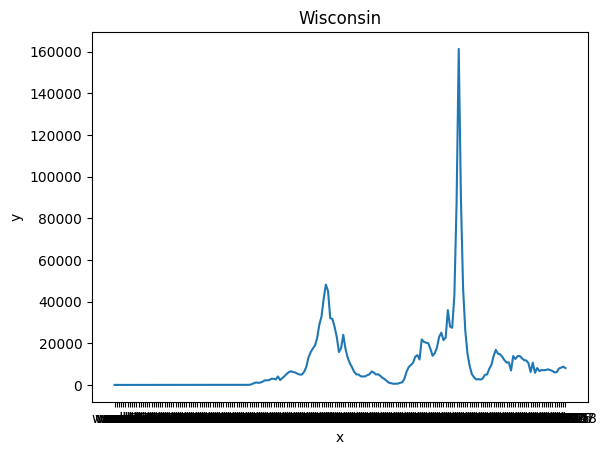

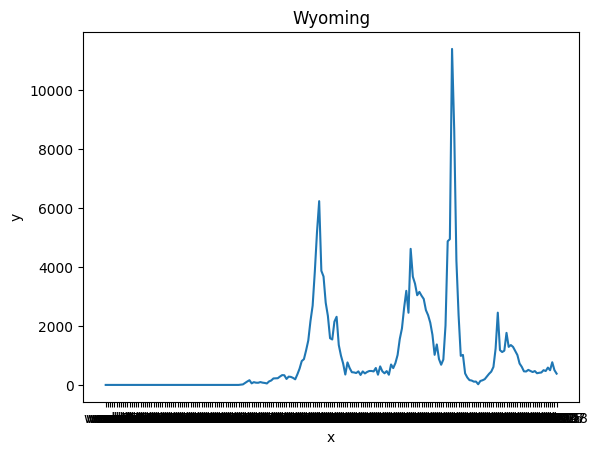

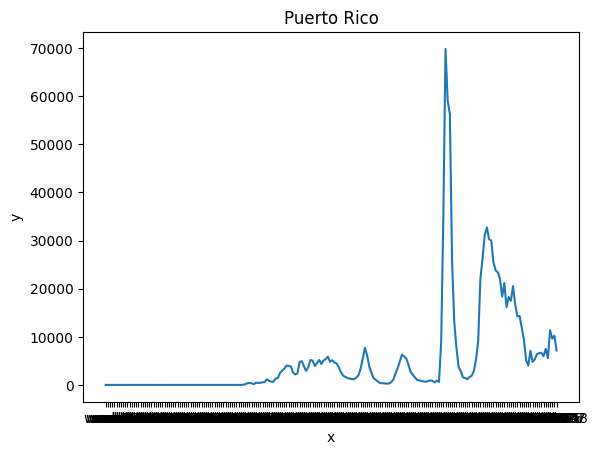

In [93]:
week = list(master_df.columns[1:])

import matplotlib.pyplot as plt

for state in states_mob:
    x=list(master_df[master_df["states"]==state].iloc[0].tolist())
    state=x[0]
    data=x[1:]
    
    plt.plot(week,data)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(state)
    
    plt.show()

In [113]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the dataframes row-wise
scaled_df1 = pd.DataFrame(master_df.iloc[:, 1:].apply(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten(), axis=1))
scaled_df2 = pd.DataFrame(m_df.iloc[:, 1:].apply(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten(), axis=1))

scaled_df1.insert(loc=0, column='states', value=master_df['states'])
scaled_df2.insert(loc=0, column='states', value=m_df['states'])


In [122]:
scaled_df2

states                                                  0
0                Alabama  [0.3362515915285169, 0.34114537438780423, 0.31...
1                 Alaska  [0.25604664887020107, 0.2564771527499228, 0.22...
2                Arizona  [0.4073743110333854, 0.394465411142645, 0.3926...
3               Arkansas  [0.321678717753061, 0.3443525365905779, 0.3238...
4             California  [0.37648680873863694, 0.38778536458623875, 0.3...
5               Colorado  [0.29604437221740787, 0.28935104974721826, 0.2...
6            Connecticut  [0.4073097824339753, 0.4584991407153939, 0.392...
7               Delaware  [0.3577480160658289, 0.38121242320443993, 0.35...
8   District of Columbia  [0.8336352760811054, 0.690606230119069, 0.6738...
9                Florida  [0.2653377065484642, 0.2664271972483683, 0.243...
10               Georgia  [0.38931369151442596, 0.3710219880374229, 0.35...
11                Hawaii  [0.25868663950026005, 0.2629048242280149, 0.23...
12                 Idaho  [0.32970541923598007, 0.3414812431828435, 0.32...
13              Illinois  [0.38138732270407255, 0.3818299669468191, 0.34...
14               Indiana  [0.38608317434015915, 0.398753893055165, 0.365...
15                  Iowa  [0.3427443068426102, 0.3512066809147343, 0.339...
16                Kansas  [0.4368178806160314, 0.4627744873034326, 0.450...
17              Kentucky  [0.34976211011418196, 0.37986354800921696, 0.3...
18             Louisiana  [0.3832262160532608, 0.36373254882967165, 0.35...
19                 Maine  [0.22557921862313965, 0.25857192216397085, 0.2...
20              Maryland  [0.5016026736312013, 0.5080024624251928, 0.463...
21         Massachusetts  [0.38815237629857974, 0.435583389106132, 0.389...
22              Michigan  [0.2523482297925738, 0.2513678320421531, 0.227...
23             Minnesota  [0.4662264967510562, 0.4666589028904183, 0.419...
24           Mississippi  [0.42001183769124734, 0.42262716164971753, 0.3...
25              Missouri  [0.37260929968598583, 0.3928442845705174, 0.37...
26               Montana  [0.23986441061408995, 0.24207230011076797, 0.2...
27              Nebraska  [0.3332587269619, 0.359006412888143, 0.3550429...
28                Nevada  [0.4654537084351322, 0.4927628385033276, 0.403...
29         New Hampshire  [0.41132640452385216, 0.47704262575094797, 0.4...
30            New Jersey  [0.4377283758550589, 0.46903359104444164, 0.43...
31            New Mexico  [0.3824182321533547, 0.3856340757087307, 0.377...
32              New York  [0.42852926657255397, 0.4487433658344795, 0.39...
33        North Carolina  [0.37381208194066273, 0.3570226877293888, 0.33...
34          North Dakota  [0.44629690895655744, 0.43057722061646536, 0.4...
35                  Ohio  [0.3380822164507451, 0.364619768448872, 0.3398...
36              Oklahoma  [0.31240899920248977, 0.33226121781880397, 0.3...
37                Oregon  [0.3925081556663068, 0.409882335756451, 0.3781...
38          Pennsylvania  [0.3433582087882253, 0.3725378739883794, 0.339...
39          Rhode Island  [0.39439515486484883, 0.46308965146173126, 0.4...
40        South Carolina  [0.3043704857704771, 0.29523870859303636, 0.27...
41          South Dakota  [0.23414347371600247, 0.24489797858176365, 0.2...
42             Tennessee  [0.32888435709638086, 0.32990262070322046, 0.3...
43                 Texas  [0.37067045746312444, 0.3738336442704108, 0.34...
44                  Utah  [0.38042346659823956, 0.38598937450045906, 0.3...
45               Vermont  [0.4427243543182874, 0.4671099771456398, 0.410...
46              Virginia  [0.41752102840053834, 0.4139514318740163, 0.37...
47            Washington  [0.3927754901748429, 0.40908761592044895, 0.36...
48         West Virginia  [0.35310919364876103, 0.38871089462841524, 0.3...
49             Wisconsin  [0.39557220051757996, 0.38247633332716885, 0.3...
50               Wyoming  [0.26316954235264745, 0.2580285293211726, 0.27...
51           Puerto Rico  [0.034253145038416144, 0.040136188345163

In [121]:
scaled_df1[scaled_df1["states"]=="Alabama"].iloc[0].tolist()[1]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [129]:
list(range(1,209))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [135]:
week = list(range(1,209))

import matplotlib.pyplot as plt

for state in states_mob:

    x=list(scaled_df1[scaled_df1["states"]==state].iloc[0].tolist())
    state=x[0]
    y1=x[1]
    
    x=list(scaled_df2[scaled_df2["states"]==state].iloc[0].tolist())
    state=x[0]
    y2=x[1]
    
    # Create a 1x2 subplot grid and plot the two graphs
    fig, ax = plt.subplots()
    
        
    ax.plot(week, y1, label = "cases")
    ax.plot(week, y2, label = "mobility")
    

    plt.legend()
    plt.title(state)
    plt.xlabel('x')
    plt.ylabel('y')
    

    plt.savefig('covid_mobility_statewise_weekly/'+str(state)+'.jpg')
    plt.clf()
    

c:\users\rkungu2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

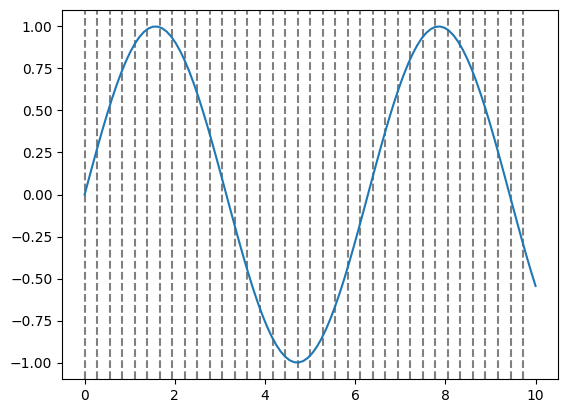

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Create some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a figure and axis object
fig, ax = plt.subplots()

# Draw 36 equispaced vertical lines
for i in range(36):
    ax.axvline(x=10*i/36, color='gray', linestyle='--')

# Plot the data
ax.plot(x, y)

# Show the plot
plt.show()
